In [1]:
!pip install optuna


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install -U ydata-profiling


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install shap


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install catboost


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install --upgrade matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install permetrics


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install category_encoders


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install lxml


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [136]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
     --- --------------------------------- 20.5/250.9 kB 330.3 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/250.9 kB 262.6 kB/s eta 0:00:01
     ------- ----------------------------- 51.2/250.9 kB 262.6 kB/s eta 0:00:01
     ---------- -------------------------- 71.7/250.9 kB 281.8 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.9 kB 409.6 kB/s eta 0:00:01
     -------------------- --------------- 143.4/250.9 kB 449.7 kB/s eta 0:00:01
     --------------------------- -------- 194.6/250.9 kB 513.4 kB/s eta 0:00:01
     -------------------------------- --- 225.3/250.9 kB 551.4 kB/s eta 0:00:01
     ------------------------------------ 250.9/250.9 kB 571.7 kB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import re
import phik
from phik import report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import shap
import optuna
import catboost
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from permetrics.regression import RegressionMetric
from numpy import array
from joblib import load, dump
from ydata_profiling import ProfileReport
import lxml
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Загрузка данных и очистка**

Произведен парсинг данных с помощью API HH.ru

In [12]:
uni_data = pd.read_csv('uni_data.csv')

In [13]:
uni_data = uni_data.drop('Unnamed: 0', axis=1)

In [140]:
uni_data.head(100)

key_skills             area  \
0                                    Linux, SQL, Unix            Тверь   
1   BPMN, EPC, UML, MS Dynamics CRM, Power BI, SQL...           Москва   
2                                                 NaN           Москва   
3   Работа в команде, Работа с базами данных, Базы...      Симферополь   
4   PostgreSQL, Clickhouse, Numpy, pandas, Kuberne...           Москва   
..                                                ...              ...   
95                                                NaN           Москва   
96  Java, Kubernetes, Azure, NoSQL, PostgreSQL, Neo4J           Алматы   
97  Python, SQL, Работа с базами данных, Анализ да...  Санкт-Петербург   
98  Adobe Analytics, Английский язык, Google Analy...           Москва   
99  Ведение переговоров, 1С: Предприятие, Деловая ...             Тула   

            schedule          experience  salary_from  salary_to currency  \
0     Сменный график  От 1 года до 3 лет          NaN   200000.0      RUR   
1   Удаленная работа  От 1 года до 3 лет          NaN   150000.0      RUR   
2        Полный день       От 3 до 6 лет          NaN   370000.0      RUR   
3        Полный день       От 3 до 6 лет      35000.0        NaN      RUR   
4        Полный день       От 3 до 6 лет          NaN   350000.0      RUR   
..               ...                 ...          ...        ...      ...   
95       Полный день       От 3 до 6 лет     300000.0        NaN      RUR   
96     Гибкий график       От 3 до 6 лет    1500000.0        NaN      KZT   
97       Полный день           Нет опыта      30000.0    40000.0      RUR   
98       Полный день       От 3 до 6 лет          NaN   200000.0      RUR   
99       Полный день  От 1 года до 3 лет      90000.0   150000.0      RUR   

                  created_at        employment   languages  \
0   2024-08-22T13:08:27+0300  Полная занятость         NaN   
1   2024-08-22T13:08:27+0300  Полная занятость  Английский   
2   2024-08-22T13:08:27+0300  Полная занятость         NaN   
3   2024-08-22T13:08:27+0300  Полная занятость         NaN   
4   2024-08-22T13:08:27+0300  Полная занятость         NaN   
..                       ...               ...         ...   
95  2024-08-22T13:08:27+0300  Полная занятость         NaN   
96  2024-08-22T13:08:27+0300  Полная занятость  Английский   
97  2024-08-22T13:08:27+0300  Полная занятость         NaN   
98  2024-08-22T13:08:27+0300  Полная занятость  Английский   
99  2024-08-22T13:08:27+0300  Полная занятость         NaN   

                professional_roles  
0                Системный инженер  
1                  Бизнес-аналитик  
2                         Аналитик  
3          Системный администратор  
4                   Дата-сайентист  
..                             ...  
95  Руководитель группы разработки  
96        Программист, разработчик  
97    BI-аналитик, аналитик данных  
98                        Аналитик  
99                        Аналитик  

[100 rows x 11 columns]

In [108]:
# Извлечение ключевых навыков
hh_key_skills = uni_data['key_skills'].str.split(', ').explode().unique()

# Приведение к списку
hh_key_skills = hh_key_skills.tolist()

# Вывод результата
print(hh_key_skills)

['Linux', 'SQL', 'Unix', 'BPMN', 'EPC', 'UML', 'MS Dynamics CRM', 'Power BI', 'MS Excel', 'MS Word', 'Бизнес-анализ', 'Business Analysis', 'Английский язык', 'Low-Code', 'Power Platform', 'System Analysis', nan, 'Работа в команде', 'Работа с базами данных', 'Базы данных', 'MS Access', 'Cистемы управления базами данных', 'PostgreSQL', 'Clickhouse', 'Numpy', 'pandas', 'Kubernetes', 'Python', 'PySpark', 'Hadoop', 'Apache Hive', 'Apache Airflow', 'Docker', 'GitLab CI', 'Git', 'Golang', 'Machine learning', 'AI', 'Системный анализ', 'XML', 'API', 'Agile', 'Java', 'Microservices architecture', 'REST API', 'Groovy', 'Consulting', 'Support and configure the project management system (no-code)', 'Develop scripts for automating business processes within the system (Groovy', 'Java 11+)', "Support and enhance existing microservices that ensure the system's functionality", 'Business English', 'Коммуникабельность', 'Системность', 'Обучаемость', 'Оперативность', 'IT', 'Data Engineering', 'Energy Manag

In [107]:
# Извлечение ключевых навыков для датасета ods
hh_key_skills = uni_data['area'].str.split(', ').explode().unique()

# Приведение к списку
hh_key_skills = hh_key_skills.tolist()

# Вывод результата
print(hh_key_skills)

['Тверь', 'Москва', 'Симферополь', 'Алматы', 'Новосибирск', 'Армения', 'Ташкент', 'Калининград', 'Санкт-Петербург', 'Екатеринбург', 'Казань', 'Тбилиси', 'Ижевск', 'Батуми', 'Краснодар', 'Самара', 'Владивосток', 'Великобритания', 'Воронеж', 'Электроугли (Московская область)', 'Баку', 'Красноярск', 'Минск', 'Тула', 'Ростов-на-Дону', 'Нижний Новгород', 'Астрахань', 'Ивантеевка (Московская область)', 'Омск', 'Балашиха (Московская область)', 'Атырау', 'Астана', 'Реутов (Московская область)', 'Польша', 'Химки (Московская область)', 'Пермь', 'Борисоглебск', 'Тольятти', 'Челябинск', 'Обнинск', 'Домодедово (Московская область)', 'Люберцы  (Московская область)', 'Сербия', 'Томск', 'Иркутск', 'Саратов', 'Барнаул', 'Тамбов', 'Набережные Челны', 'Владикавказ', 'Мытищи (Московская область)', 'Кипр', 'Березовский (Свердловская область)', 'Тюмень', 'Махачкала', 'Семей', 'Пушкино (Московская область)', 'Бишкек', 'Сочи', 'Долгопрудный (Московская область)', 'Волгоград', 'Липецк', 'Узловая', 'Рязань', 'Г

In [ ]:
%%script false --no-raise-error
# Ячейка заблокирована, для выполннения удалить строку выше

import json

# Загрузка данных из JSON файла
with open('ODS jobs.json', 'r', encoding='utf-8') as file:
    ods_jobs_json = json.load(file)

# Извлечение списка сообщений
messages = ods_jobs_json['messages']

# Преобразование в DataFrame
ods_jobs = pd.DataFrame(messages)

# Функция для обработки поля 'text'
def parse_text(text):
    if isinstance(text, list):
        return ''.join([t if isinstance(t, str) else t.get('text', '') for t in text])
    return text

# Применение функции к столбцу 'text'
ods_jobs['text'] = ods_jobs['text'].apply(parse_text)

# Вывод первых нескольких строк DataFrame
ods_jobs.head(10)

In [ ]:
%%script false --no-raise-error
# Ячейка заблокирована, для выполннения удалить строку выше

import requests

# Функция для скачивания HTML по ссылке
def download_html(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.text
    except requests.RequestException as e:
        return f"Error fetching {url}: {e}"

# Функция для извлечения ссылок и скачивания контента
def extract_and_download_html(entities):
    html_contents = []
    for entity in entities:
        if 'href' in entity:
            html_content = download_html(entity['href'])
            html_contents.append(html_content)
    return html_contents

# Применяем функцию для извлечения ссылок и загрузки HTML для каждого элемента в text_entities
ods_jobs['html_content'] = ods_jobs['text_entities'].apply(extract_and_download_html)

# Выводим результат
ods_jobs[['text_entities', 'html_content']]
ods_jobs.to_csv('ODS_jobs.csv', index=False)

In [ ]:
# Извлечение ключевых навыков
hh_key_skills = uni_data['key_skills'].str.split(', ').explode().unique()

# Приведение к списку
hh_key_skills = hh_key_skills.tolist()

# Вывод результата
print(hh_key_skills)

Итог первичной подготовки датасета ods:

In [109]:
result = pd.read_csv('result.csv')
result.head(5)

Name_from  From_from     To_to  \
0                Senior ML Engineer (NLP and RecSys)   557700.0  650650.0   
1                               Аналитик-Алгоритмист   185900.0  278850.0   
2  Лидер центра компетенций Искусственного Интелл...   250000.0  399998.0   
3                          Machine Learning Engineer   278850.0  929500.0   
4                                   Python Developer   185900.0  232375.0   

                                      Description_to  
0   About us: Whisk is the thriving cooking commu...  
1   Компания «\u200eКуБорд»  — первая российская ...  
2   Группа компаний Московская Биржа ищет лидера ...  
3   AI Clone - передовые технологии, которые помо...  
4   Всем привет! В небольшой, но амбициозный межд...

In [125]:
print(hh_key_skills)

['Linux', 'SQL', 'Unix', 'BPMN', 'EPC', 'UML', 'MS Dynamics CRM', 'Power BI', 'MS Excel', 'MS Word', 'Бизнес-анализ', 'Business Analysis', 'Английский язык', 'Low-Code', 'Power Platform', 'System Analysis', 'nan', 'Работа в команде', 'Работа с базами данных', 'Базы данных', 'MS Access', 'Cистемы управления базами данных', 'PostgreSQL', 'Clickhouse', 'Numpy', 'pandas', 'Kubernetes', 'Python', 'PySpark', 'Hadoop', 'Apache Hive', 'Apache Airflow', 'Docker', 'GitLab CI', 'Git', 'Golang', 'Machine learning', 'AI', 'Системный анализ', 'XML', 'API', 'Agile', 'Java', 'Microservices architecture', 'REST API', 'Groovy', 'Consulting', 'Support and configure the project management system (no-code)', 'Develop scripts for automating business processes within the system (Groovy', 'Java 11+)', "Support and enhance existing microservices that ensure the system's functionality", 'Business English', 'Коммуникабельность', 'Системность', 'Обучаемость', 'Оперативность', 'IT', 'Data Engineering', 'Energy Man

In [126]:
print(hh_key_skills[5])

UML


In [138]:
# Извлечение ключевых навыков
hh_key_skills5 = uni_data['professional_roles'].str.split(', ').explode().unique()

# Приведение к списку
hh_key_skills5 = hh_key_skills5.tolist()

# Вывод результата
print(hh_key_skills5)

['Системный инженер', 'Бизнес-аналитик', 'Аналитик', 'Системный администратор', 'Дата-сайентист', 'Программист', 'разработчик', nan, 'Менеджер по маркетингу', 'интернет-маркетолог', 'Другое', 'Руководитель группы разработки', 'BI-аналитик', 'аналитик данных', 'Системный аналитик', 'Менеджер продукта', 'Финансовый аналитик', 'инвестиционный аналитик', 'Кладовщик', 'Менеджер по закупкам', 'Менеджер по продажам', 'менеджер по работе с клиентами', 'Руководитель проектов', 'Продуктовый аналитик', 'Директор по маркетингу и PR (CMO)', 'Маркетолог-аналитик', 'Сетевой инженер', 'Специалист технической поддержки', 'Финансовый менеджер', 'Директор по информационным технологиям (CIO)', 'Оператор станков с ЧПУ', 'Руководитель отдела аналитики', 'Финансовый контролер', 'Бухгалтер', 'Генеральный директор', 'исполнительный директор (CEO)', 'Инженер-конструктор', 'инженер-проектировщик', 'Научный специалист', 'исследователь', 'Казначей', 'Менеджер по логистике', 'менеджер по ВЭД', 'Дизайнер', 'художник

In [122]:
def find_strings_in_column(df, column_name, string_list, new_column_name):
    """
    Функция, которая ищет строки из списка в каждой ячейке указанной колонки DataFrame.

    :param df: Исходный DataFrame
    :param column_name: Название колонки, в которой осуществляется поиск
    :param string_list: Список строк для поиска
    :param new_column_name: Название новой колонки, куда будут записываться результаты
    :return: Новый DataFrame с добавленной колонкой
    """

    def search_strings(cell):
        # Проверяем, является ли ячейка NaN
        if pd.isna(cell):
            return None

        # Преобразуем любой тип в строку
        try:
            cell_str = str(cell)
            #print(cell_str)
        except Exception as e:
            print(f"Ошибка преобразования значения {cell}: {e}")
            return None

        # Находим все строки из string_list, присутствующие в ячейке
        found_strings = [s for s in string_list if s in cell_str]
        return ', '.join(found_strings) if found_strings else None

    # Применяем функцию search_strings к указанной колонке
    df[new_column_name] = df[column_name].apply(search_strings)

    return df

In [128]:
import pandas as pd

def find_strings_in_column(df, column_name, string_list, new_column_name):
    """
    Функция, которая ищет строки из списка в каждой ячейке указанной колонки DataFrame.

    :param df: Исходный DataFrame
    :param column_name: Название колонки, в которой осуществляется поиск
    :param string_list: Список строк для поиска
    :param new_column_name: Название новой колонки, куда будут записываться результаты
    :return: Новый DataFrame с добавленной колонкой
    """

    def search_strings(cell):
        # Проверяем, является ли ячейка NaN
        if pd.isna(cell):
            return None

        # Преобразуем ячейку в строку
        cell_str = str(cell)

        # Находим все строки из string_list, присутствующие в ячейке
        found_strings = [s for s in string_list if s in cell_str]

        # Возвращаем найденные строки в исходном виде, если они есть
        return ', '.join(found_strings) if found_strings else None

    # Применяем функцию search_strings к указанной колонке
    df[new_column_name] = df[column_name].apply(search_strings)

    return df

In [129]:
hh_key_skills = list(map(str, hh_key_skills))
result2 = find_strings_in_column(result, 'Description_to', hh_key_skills, 'key_skills')
result2.head(20)

Name_from  From_from      To_to  \
0                 Senior ML Engineer (NLP and RecSys)   557700.0  650650.00   
1                                Аналитик-Алгоритмист   185900.0  278850.00   
2   Лидер центра компетенций Искусственного Интелл...   250000.0  399998.00   
3                           Machine Learning Engineer   278850.0  929500.00   
4                                    Python Developer   185900.0  232375.00   
5                                Data Engineer | Lead   300000.0  400000.00   
6                       Lead Product Analyst (Remote)   200000.0  300000.00   
7   Junior/Middle Data Analyst на рекомендательные...   100000.0  350000.00   
8   Lead/Senior Data engineer на построение Data/D...   300000.0  399999.00   
9                                      Data Scientist   400000.0  550000.00   
10                           Team Lead Data Scientist   400000.0  520000.00   
11                                   Python developer   300000.0  400000.00   
12  Middle+ / Senior+ Data scientist (RnD в Риски ...   270000.0  450000.00   
13                             MLE, DS Middle/Middle+   120000.0  280000.00   
14                           Tech Lead Java Developer   650650.0  929407.05   
15  Data Scientist: R&D и бизнес внедрением метрик...   100000.0  500000.00   
16                                    Аналитик данных   100000.0  200000.00   
17                                          MLOps/C++   650650.0  836550.00   
18              Computer Vision/ML Engineer (Junior+)   130000.0  200000.00   
19  Senior Data Scientist/Machine Learning Enginee...   350000.0  450000.00   

                                       Description_to  \
0    About us: Whisk is the thriving cooking commu...   
1    Компания «\u200eКуБорд»  — первая российская ...   
2    Группа компаний Московская Биржа ищет лидера ...   
3    AI Clone - передовые технологии, которые помо...   
4    Всем привет! В небольшой, но амбициозный межд...   
5    OSKELLY  - продуктовая IT компания. Первая в ...   
6    Turing is a hardware/software company that de...   
7    Компания ESN создает социальные продукты ново...   
8    Компания ESN создает социальные продукты ново...   
9    Мы аккредитованная компания VERME - более 7 л...   
10   Мы делаем ИТ для ритейла реального времени. Н...   
11   В Samokat.tech мы делаем ИТ-решения для ритей...   
12   Кто мы: RnD подразделение Блока Риски, Сберба...   
13   Позиции x4: MLE, DS, DE, MLOps Junior+ -> Mid...   
14   Компания BrainShells в поисках в дружную кома...   
15   Всем привет! Я нахожусь в поиске DS-ов в свою...   
16   Всем привет! У нас в Agima.ai есть не только ...   
17   We will trust you: Innovate and design soluti...   
18   Tevian  – российский разработчик систем компь...   
19   Компания  ESN  создает социальные продукты но...   

                                           key_skills  
0   SQL, Kubernetes, Python, DVC, MySQL, PyTorch, ...  
1   SQL, Английский язык, pandas, Kubernetes, Pyth...  
2   Python, Коммуникабельность, TensorFlow, PyTorc...  
3                                 AI, IT, CV, ML, C,   
4   SQL, PostgreSQL, Python, Git, API, AWS, Rabbit...  
5   SQL, PostgreSQL, Python, Java, IT, ETL, MySQL,...  
6                      AI, Go, R, Excel, reports, C,   
7   Clickhouse, Python, Git, Jira, Spark, Analyst,...  
8   Clickhouse, Python, Git, Java, ETL, Kafka, Jir...  
9   Системность, IT, 1С, R, Планирование, , интегр...  
10  SQL, PostgreSQL, Kubernetes, Python, Hadoop, D...  
11  SQL, PostgreSQL, Kubernetes, Python, Hadoop, D...  
12  Python, AI, Agile, IT, ML, R, Soft skills, AI/...  
13  Linux, Python, Hadoop, Docker, Git, MLOps, Sca...  
14  Английский язык, Java, machine learning, ML, R...  
15  Hadoop, Spark, ML, R, LTV, data science, Data ...  
16  SQL, Python, ETL, Tableau, Airflow, R, Pandas,...  
17  Linux, nan, Python, AI, MLflow, AWS, Airflow, ...  
18  IT, CV, NLP, ML, ONNX, TensorRT, R, C++, Resne...  
19  Python, CI/CD, Machine Learning, R, Data Scien...

In [131]:
# Извлечение ключевых навыков
hh_area = uni_data['area'].str.split(', ').explode().unique()

# Приведение к списку
hh_area = hh_area.tolist()
hh_area = list(map(str, hh_area))

# Вывод результата
print(hh_area)

['Тверь', 'Москва', 'Симферополь', 'Алматы', 'Новосибирск', 'Армения', 'Ташкент', 'Калининград', 'Санкт-Петербург', 'Екатеринбург', 'Казань', 'Тбилиси', 'Ижевск', 'Батуми', 'Краснодар', 'Самара', 'Владивосток', 'Великобритания', 'Воронеж', 'Электроугли (Московская область)', 'Баку', 'Красноярск', 'Минск', 'Тула', 'Ростов-на-Дону', 'Нижний Новгород', 'Астрахань', 'Ивантеевка (Московская область)', 'Омск', 'Балашиха (Московская область)', 'Атырау', 'Астана', 'Реутов (Московская область)', 'Польша', 'Химки (Московская область)', 'Пермь', 'Борисоглебск', 'Тольятти', 'Челябинск', 'Обнинск', 'Домодедово (Московская область)', 'Люберцы  (Московская область)', 'Сербия', 'Томск', 'Иркутск', 'Саратов', 'Барнаул', 'Тамбов', 'Набережные Челны', 'Владикавказ', 'Мытищи (Московская область)', 'Кипр', 'Березовский (Свердловская область)', 'Тюмень', 'Махачкала', 'Семей', 'Пушкино (Московская область)', 'Бишкек', 'Сочи', 'Долгопрудный (Московская область)', 'Волгоград', 'Липецк', 'Узловая', 'Рязань', 'Г

In [134]:
result3 = find_strings_in_column(result2, 'Description_to', hh_area, 'area')
result3.head(100)

Name_from  From_from     To_to  \
0                 Senior ML Engineer (NLP and RecSys)   557700.0  650650.0   
1                                Аналитик-Алгоритмист   185900.0  278850.0   
2   Лидер центра компетенций Искусственного Интелл...   250000.0  399998.0   
3                           Machine Learning Engineer   278850.0  929500.0   
4                                    Python Developer   185900.0  232375.0   
..                                                ...        ...       ...   
95                        ML Computer Vision Engineer   125000.0  278850.0   
96                          Machine Learning Engineer   232375.0  370000.0   
97                                     Data Scientist   160000.0  450000.0   
98                          Middle/Senior ML Engineer   200000.0  650000.0   
99                        DBA в команду платформы T&S   350000.0  464750.0   

                                       Description_to  \
0    About us: Whisk is the thriving cooking commu...   
1    Компания «\u200eКуБорд»  — первая российская ...   
2    Группа компаний Московская Биржа ищет лидера ...   
3    AI Clone - передовые технологии, которые помо...   
4    Всем привет! В небольшой, но амбициозный межд...   
..                                                ...   
95   Разработка AI-соулмейта, позволяющего юзерам ...   
96   Предстоит заниматься созданием LLM-подобной м...   
97   Yappy - платформа коротких вериткальных видео...   
98   Цель платформы - обеспечить инфраструктурой и...   
99   Сейчас мы ищем опытного специалиста, который ...   

                                           key_skills     area  
0   SQL, Kubernetes, Python, DVC, MySQL, PyTorch, ...     None  
1   SQL, Английский язык, pandas, Kubernetes, Pyth...      Бор  
2   Python, Коммуникабельность, TensorFlow, PyTorc...     None  
3                                 AI, IT, CV, ML, C,      None  
4   SQL, PostgreSQL, Python, Git, API, AWS, Rabbit...     None  
..                                                ...      ...  
95  AI, API, IT, ML, R, LLM, GPT, LLMs, Тестирован...     None  
96  Git, NLP, R, LLM, BERT, QA, GPT, Classificatio...     None  
97  Numpy, Python, PySpark, PyTorch, Go, CV, NLP, ...     None  
98  SQL, Hadoop, IT, Kafka, Big Data, NoSQL, Wildb...     None  
99  SQL, Python, IT, Airflow, ML, S3, Data Scienti...  Ташкент  

[100 rows x 6 columns]

In [137]:
# Принял решение вручную разметить данные, так как всего 230 срок, чтобы разметить колонки с profession_roles, employment, expirience. В конце обработки датасета hh.ru будет дальнейшая обработка датасета ods.
result3.to_excel('result3.xlsx', index=False)

In [151]:
# Результат разметки
ods_jobs_result = pd.read_excel('result7.xlsx', engine='openpyxl')

In [152]:
ods_jobs_result.head(5)

professional_roles          schedule  experience  from_from     to_to  \
0     Дата-сайентист  Удаленная работа         3.0   578503.2  674920.4   
1           Аналитик     Гибкий график         2.0   192834.4  289251.6   
2     Дата-сайентист       Полный день         3.0   250000.0  399998.0   
3     Дата-сайентист     Гибкий график         3.0   289251.6  964172.0   
4     Дата-сайентист  Удаленная работа         2.0   192834.4  241043.0   

                                          key_skills area        employment  \
0  SQL, Kubernetes, Python, DVC, MySQL, PyTorch, ...  NaN  Полная занятость   
1  SQL, Английский язык, pandas, Kubernetes, Pyth...  Бор  Полная занятость   
2  Python, Коммуникабельность, TensorFlow, PyTorc...  NaN  Полная занятость   
3                                AI, IT, CV, ML, C,   NaN  Полная занятость   
4  SQL, PostgreSQL, Python, Git, API, AWS, Rabbit...  NaN  Полная занятость   

     salary  
0  626711.8  
1  241043.0  
2  324999.0  
3  626711.8  
4  216938.7

Определить тип данных в каждом столбце

In [15]:
uni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469 entries, 0 to 7468
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key_skills          5280 non-null   object 
 1   area                7469 non-null   object 
 2   schedule            7314 non-null   object 
 3   experience          7469 non-null   object 
 4   salary_from         5169 non-null   float64
 5   salary_to           3586 non-null   float64
 6   currency            6195 non-null   object 
 7   created_at          7469 non-null   object 
 8   employment          7314 non-null   object 
 9   languages           622 non-null    object 
 10  professional_roles  7314 non-null   object 
dtypes: float64(2), object(9)
memory usage: 642.0+ KB


Определить количество отсутствующих значений

In [16]:
uni_data.isna().sum()

key_skills            2189
area                     0
schedule               155
experience               0
salary_from           2300
salary_to             3883
currency              1274
created_at               0
employment             155
languages             6847
professional_roles     155
dtype: int64

Привести данные к необходимым типам

In [17]:
uni_data['salary_from'] = pd.to_numeric(uni_data['salary_from'], errors='coerce')
uni_data['salary_to'] = pd.to_numeric(uni_data['salary_to'], errors='coerce')

In [18]:
df_copy = uni_data.copy()

Берем среднее арифметическое от опыта и диапазона зарплат

In [19]:
def clean_exp(exp):
    try:
        if pd.isna(exp):
            return None

        years = re.findall(r'\d+', exp)
        exp_cleaned = None

        if len(years) == 1:
            exp_cleaned = int(years[0])
        elif len(years) == 2:
            exp_cleaned = (int(years[0]) + int(years[1])) / 2
        elif len(years) == 0:
            exp_cleaned = 0

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    return exp_cleaned

In [20]:
def clean_salary(df):
    df.loc[(~df['salary_from'].isna()) & (~df['salary_to'].isna()), 'salary'] = (df['salary_from'] + df['salary_to']) / 2

    df.loc[(~df['salary_from'].isna()) & (df['salary_to'].isna()), 'salary'] = df['salary_from']
    df.loc[(df['salary_from'].isna()) & (~df['salary_to'].isna()), 'salary'] = df['salary_to']
    df = df.drop(['salary_to', 'salary_from'], axis=1)
    return df

In [21]:
df_copy['salary'] = ''

In [22]:
df_copy['key_skills'] = df_copy['key_skills'].str.lower()
df_copy['experience'] = df_copy['experience'].apply(clean_exp)
df_copy = clean_salary(df_copy)

In [23]:
df_copy['salary'] = pd.to_numeric(df_copy['salary'], errors='coerce')

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469 entries, 0 to 7468
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key_skills          5280 non-null   object 
 1   area                7469 non-null   object 
 2   schedule            7314 non-null   object 
 3   experience          7469 non-null   float64
 4   currency            6195 non-null   object 
 5   created_at          7469 non-null   object 
 6   employment          7314 non-null   object 
 7   languages           622 non-null    object 
 8   professional_roles  7314 non-null   object 
 9   salary              6195 non-null   float64
dtypes: float64(2), object(8)
memory usage: 583.6+ KB


Признак - названия профессий будут важны для группировки навыков по процессиям. Зарплата будет таргетом.  Необходимо почистить отсутствующие значения в этих столбцах.

In [25]:
df_copy = df_copy.dropna(subset='salary')
df_copy = df_copy.dropna(subset='professional_roles')

In [26]:
df_copy.isna().sum()

key_skills            1876
area                     0
schedule                 0
experience               0
currency                 0
created_at               0
employment               0
languages             5696
professional_roles       0
salary                   0
dtype: int64

Таргетная переменная - зарплата представлена в разных валютах. Это создает необъективную оценку и выбросы.  Переводим в русские рубли,  учитываем курс валют на дату создания вакансии.  Используем API Центрального Банка.

In [27]:
df_copy['created_at'] = [date[:10] for date in df_copy['created_at']]

In [28]:
def to_rur(row):
    if row['currency'] != 'RUR':
        date = row['created_at']
        year = date[:4]
        month = date[5:7]
        day = date[8:10]

        url = f'http://www.cbr.ru/scripts/XML_daily.asp?date_req={day}/{month}/{year}'
        df = pd.read_xml(url, encoding='cp1251')
        if row['currency'] == 'BYR':
            row['currency'] = 'BYN'
        value = df[df['CharCode'] == row['currency']]['Value']
        if not value.empty:
            value = value.item().replace(',', '.')
            row['salary'] *= float(value)
            row['currency'] = 'RUR'
    return row

In [ ]:
def to_rur(row, value):
        date = row['date']
        year = date[:4]
        month = date[5:7]
        day = date[8:10]

        url = f'http://www.cbr.ru/scripts/XML_daily.asp?date_req={day}/{month}/{year}'
        df = pd.read_xml(url, encoding='cp1251')
        if row['currency'] == 'BYR':
            row['currency'] = 'BYN'
        value = df[df['CharCode'] == row['currency']]['Value']
        if not value.empty:
            value = value.item().replace(',', '.')
            row['salary'] *= float(value)
            row['currency'] = 'RUR'
        return row

In [29]:
df_copy = df_copy.apply(to_rur, axis=1)

Валюта и дата создания вакансии больше не нужны для дальнейшего анализа.

In [30]:
df_copy = df_copy.drop(['currency', 'created_at'], axis=1)

Пропуски в столбце с языками составляют более 15%.

In [31]:
df_copy = df_copy.drop('languages', axis=1)

Удаляем дубликаты при их наличии

In [32]:
df_copy = df_copy.drop_duplicates()

In [33]:
df_copy.head()

key_skills         area  \
0                                   linux, sql, unix        Тверь   
1  bpmn, epc, uml, ms dynamics crm, power bi, sql...       Москва   
2                                                NaN       Москва   
3  работа в команде, работа с базами данных, базы...  Симферополь   
4  postgresql, clickhouse, numpy, pandas, kuberne...       Москва   

           schedule  experience        employment       professional_roles  \
0    Сменный график         2.0  Полная занятость        Системный инженер   
1  Удаленная работа         2.0  Полная занятость          Бизнес-аналитик   
2       Полный день         4.5  Полная занятость                 Аналитик   
3       Полный день         4.5  Полная занятость  Системный администратор   
4       Полный день         4.5  Полная занятость           Дата-сайентист   

     salary  
0  200000.0  
1  150000.0  
2  370000.0  
3   35000.0  
4  350000.0

Во время парсинга были отобраны вакансии, не связанные с DS. Также столбец professional roles позоляет удобно сгруппировать профессии для дальнейшей обработки навыков.

In [34]:
roles_to_filter = [
    'Дата-сайентист',
    'Бизнес-аналитик',
    'Аналитик',
    'BI-аналитик, аналитик данных',
    'Системный аналитик',
    'Продуктовый аналитик',
    'Маркетолог-аналитик'
]

filtered_df = df_copy[df_copy['professional_roles'].isin(roles_to_filter)]

Вернёмся теперь к датафрейму open data science. Так как всего около 200 строк, то я принял решение вручную разметить часть признаков, такие как schedule, experience, employment и по среднему арифметическому посчитал salary.

In [153]:
# Результат разметки
ods_jobs_result = pd.read_excel('result7.xlsx', engine='openpyxl')

In [154]:
ods_jobs_result.head(5)

professional_roles          schedule  experience  from_from     to_to  \
0     Дата-сайентист  Удаленная работа         3.0   578503.2  674920.4   
1           Аналитик     Гибкий график         2.0   192834.4  289251.6   
2     Дата-сайентист       Полный день         3.0   250000.0  399998.0   
3     Дата-сайентист     Гибкий график         3.0   289251.6  964172.0   
4     Дата-сайентист  Удаленная работа         2.0   192834.4  241043.0   

                                          key_skills area        employment  \
0  SQL, Kubernetes, Python, DVC, MySQL, PyTorch, ...  NaN  Полная занятость   
1  SQL, Английский язык, pandas, Kubernetes, Pyth...  Бор  Полная занятость   
2  Python, Коммуникабельность, TensorFlow, PyTorc...  NaN  Полная занятость   
3                                AI, IT, CV, ML, C,   NaN  Полная занятость   
4  SQL, PostgreSQL, Python, Git, API, AWS, Rabbit...  NaN  Полная занятость   

     salary  
0  626711.8  
1  241043.0  
2  324999.0  
3  626711.8  
4  216938.7

Также убираем отсутствющие значения, которые необходимы в любом случае

In [156]:
ods_jobs_result = ods_jobs_result.dropna(subset='salary')
ods_jobs_result = ods_jobs_result.dropna(subset='professional_roles')

Теперь создаем датафрейм, аналогичный по структуре filtered_df, с целью их последующего объединения

In [157]:
new_df = pd.DataFrame(columns=filtered_df.columns)

# Приведение типов и переупорядочивание данных согласно filtered_df
for column in filtered_df.columns:
    if column in ods_jobs_result.columns:
        # Приводим тип данных для соответствия с filtered_df
        new_df[column] = ods_jobs_result[column].astype(filtered_df[column].dtype)

Теперь объединяем датафреймы для дальнейшего предварительного анализа

In [158]:
combined_df = pd.concat([filtered_df, new_df], ignore_index=True)

In [159]:
combined_df.head(5)

key_skills         area  \
0  bpmn, epc, uml, ms dynamics crm, power bi, sql...       Москва   
1  postgresql, clickhouse, numpy, pandas, kuberne...       Москва   
2  коммуникабельность, системность, обучаемость, ...       Москва   
3  sql, базы данных, python, power bi, ms sql, ap...  Калининград   
4  clickhouse, postgresql, mongodb, etl, powerbi,...       Москва   

           schedule  experience        employment  \
0  Удаленная работа         2.0  Полная занятость   
1       Полный день         4.5  Полная занятость   
2     Гибкий график         2.0  Полная занятость   
3       Полный день         2.0  Полная занятость   
4  Удаленная работа         4.5  Полная занятость   

             professional_roles    salary  
0               Бизнес-аналитик  150000.0  
1                Дата-сайентист  350000.0  
2                      Аналитик   90000.0  
3  BI-аналитик, аналитик данных   80000.0  
4  BI-аналитик, аналитик данных  350000.0

In [161]:
filtered_df = combined_df

По результатам предварительного анализа необходима визуализация

In [162]:
ProfileReport(filtered_df, title='My Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Признак key_skills будет обрабатан далее. Будет собран словарь синонимов навыков и отобраны уникальные навыки. Признаки будут закодированы. Очистим от отсутствующих значений



In [163]:
filtered_df = filtered_df.dropna(subset='key_skills')

Рассчет ключевых статистик для каждого типа данных

In [164]:
filtered_df.describe(include='all')

key_skills    area  \
count                                                3763    3587   
unique                                               3166     184   
top     анализ данных, sql, аналитическое мышление, ра...  Москва   
freq                                                   38    1396   
mean                                                  NaN     NaN   
std                                                   NaN     NaN   
min                                                   NaN     NaN   
25%                                                   NaN     NaN   
50%                                                   NaN     NaN   
75%                                                   NaN     NaN   
max                                                   NaN     NaN   

           schedule   experience        employment professional_roles  \
count          3763  3763.000000              3763               3763   
unique            5          NaN                 4                  8   
top     Полный день          NaN  Полная занятость           Аналитик   
freq           2502          NaN              3474               1855   
mean            NaN     2.353973               NaN                NaN   
std             NaN     1.511519               NaN                NaN   
min             NaN     0.000000               NaN                NaN   
25%             NaN     2.000000               NaN                NaN   
50%             NaN     2.000000               NaN                NaN   
75%             NaN     4.500000               NaN                NaN   
max             NaN     6.000000               NaN                NaN   

              salary  
count   3.763000e+03  
unique           NaN  
top              NaN  
freq             NaN  
mean    3.977393e+06  
std     5.422040e+07  
min     6.000000e+01  
25%     7.500000e+04  
50%     1.200000e+05  
75%     2.153673e+05  
max     1.422882e+09

Рассмотрим распределения признаков и удалим выбросы

К выбросам чувствительны коэффициенты корреляции

{'whiskers': [<matplotlib.lines.Line2D at 0x19d0f4067d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19d0f407f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d0f407670>],
 'medians': [<matplotlib.lines.Line2D at 0x19d0f3b3b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d0f3b28c0>],
 'means': []}

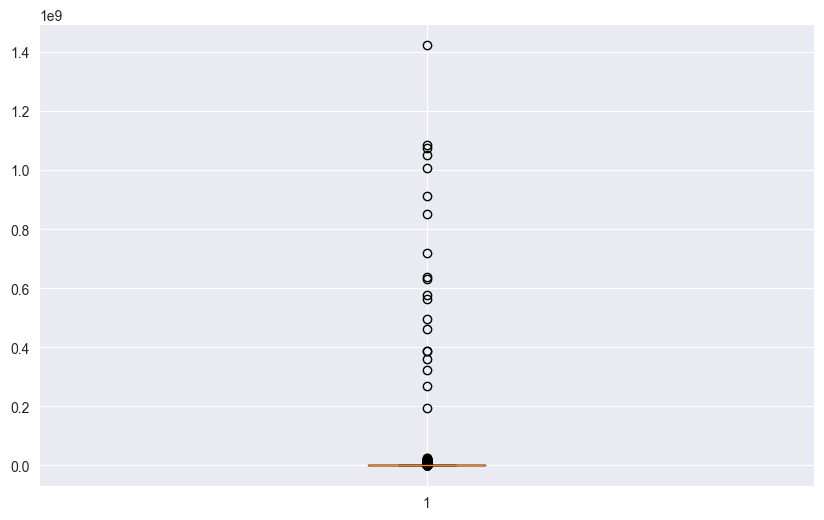

In [165]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(filtered_df['salary'])

In [166]:
q_high = filtered_df.salary.quantile(0.915)
q_low = filtered_df.salary.quantile(0.085)
clear_data = filtered_df[(filtered_df.salary < q_high) & (filtered_df.salary > q_low)]
print(f"До удаления выбросов {filtered_df.shape[0]}")
print(f"После удаления выбросов {clear_data.shape[0]}")
print(f"Удалились данные {filtered_df.shape[0] - clear_data.shape[0]}")

До удаления выбросов 3763
После удаления выбросов 3108
Удалились данные 655


{'whiskers': [<matplotlib.lines.Line2D at 0x19d0f396b30>,
 'caps': [<matplotlib.lines.Line2D at 0x19d0f397070>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d0f396890>],
 'medians': [<matplotlib.lines.Line2D at 0x19d0f3975b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d0f397850>],
 'means': []}

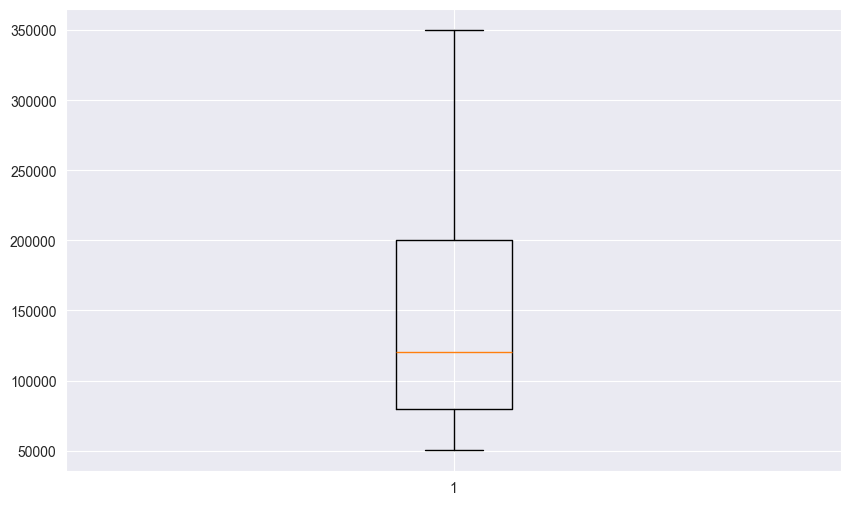

In [167]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(clear_data['salary'])

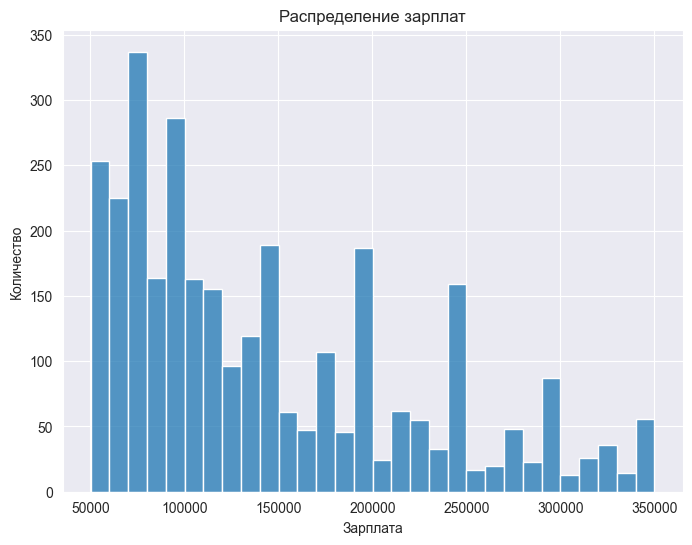

In [168]:
plt.figure(figsize=(8, 6))
sns.histplot(clear_data['salary'], bins=30, kde=False)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

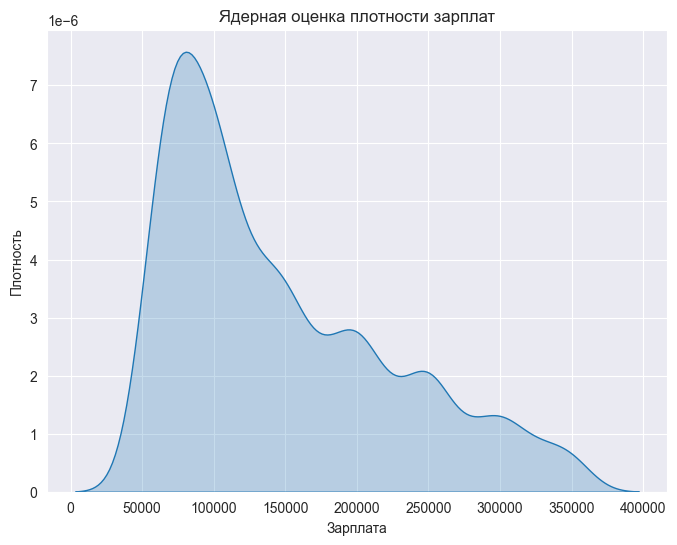

In [169]:
plt.figure(figsize=(8, 6))
sns.kdeplot(clear_data['salary'], shade=True)
plt.title('Ядерная оценка плотности зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.show()

In [170]:
profs = []
for prof in clear_data['professional_roles']:
    if isinstance(prof, str):
        profs.append(prof)

prof_counts = Counter(profs)

df_profs_counts = pd.DataFrame(prof_counts.items(), columns=['Job', 'Frequency']).sort_values(by='Frequency', ascending=False)
df_profs_counts

Job  Frequency
2                      Аналитик       1509
0               Бизнес-аналитик        487
6            Системный аналитик        464
3  BI-аналитик, аналитик данных        329
1                Дата-сайентист        233
4          Продуктовый аналитик         78
5           Маркетолог-аналитик          8

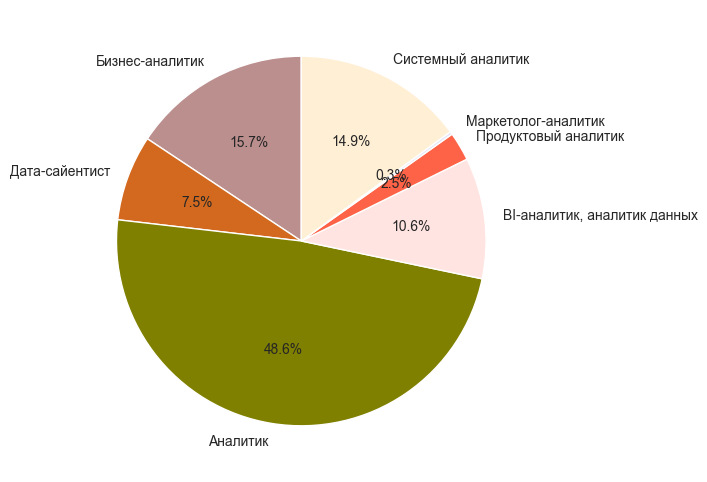

In [171]:
fig = plt.figure(figsize=(10,6))
colors = ['rosybrown', 'chocolate', 'olive', 'mistyrose', 'tomato', 'lavender', 'papayawhip']
plt.pie(prof_counts.values(), colors=colors, labels=prof_counts.keys(), startangle=90, autopct='%.1f%%')
plt.show()

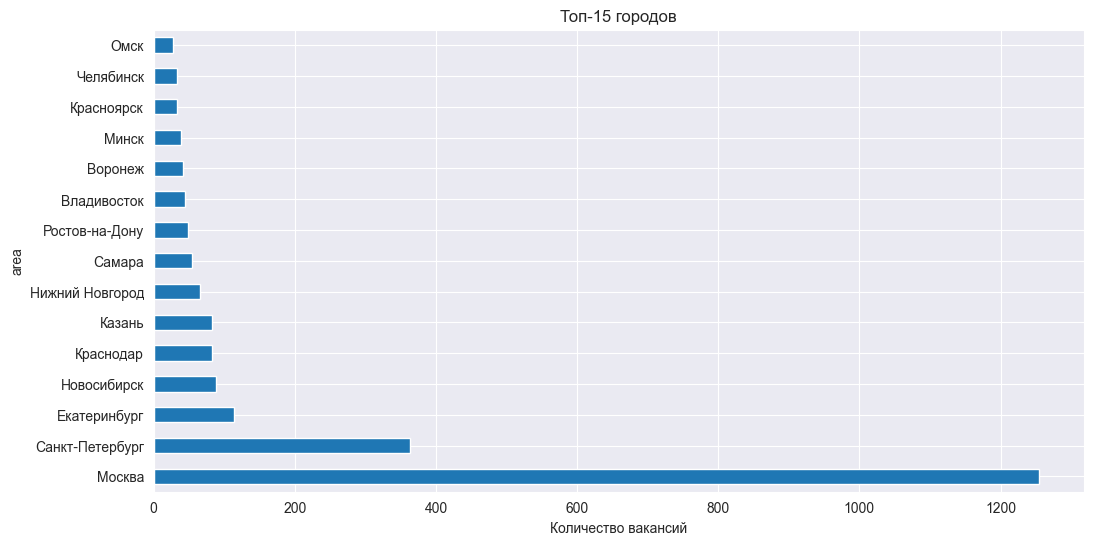

In [172]:
plt.figure(figsize=(12,6))
clear_data["area"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Топ-15 городов')
plt.xlabel('Количество вакансий')
plt.show()

Распределение графика работы, опыта работы, занятости

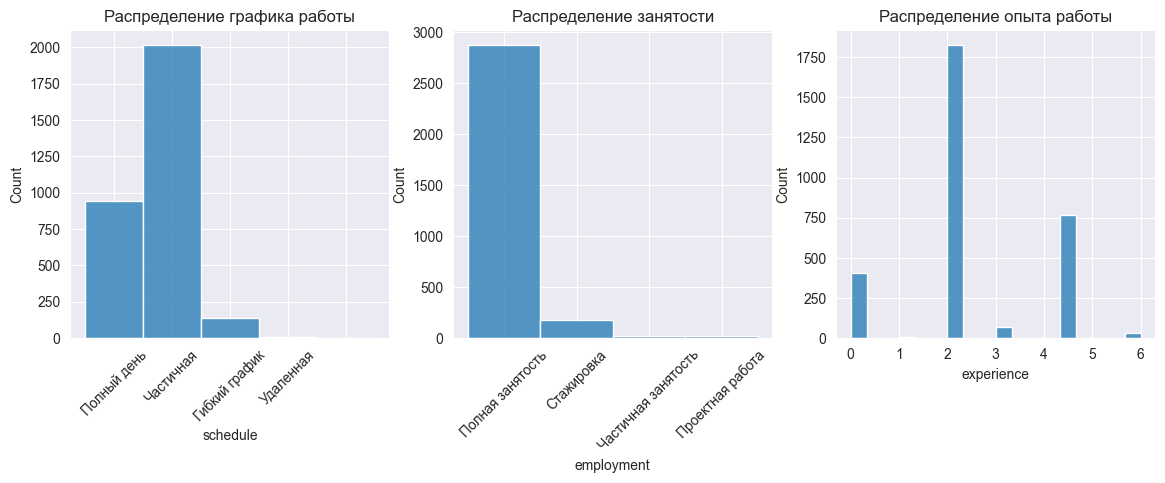

In [173]:
fig = plt.figure()
fig.tight_layout()
fig.set_size_inches(14, 4)
ax_1 = fig.add_subplot(131)
sns.histplot(clear_data, x='schedule')
ax_1.set_xticklabels(['Полный день', 'Частичная', 'Гибкий график', 'Удаленная'], rotation=45)

ax_2 = fig.add_subplot(132)
ax_2 = sns.histplot(clear_data, x='employment')
ax_2.set_xticklabels(['Полная занятость', 'Стажировка', 'Частичная занятость', 'Проектная работа'], rotation=45)

ax_3 = fig.add_subplot(133)
ax_3 = sns.histplot(clear_data, x='experience')

ax_1.set(title = 'Распределение графика работы')
ax_2.set(title = 'Распределение занятости')
ax_3.set(title = 'Распределение опыта работы')

plt.show()

Распределение графика работы, названия работы, занятости от таргетной переменной

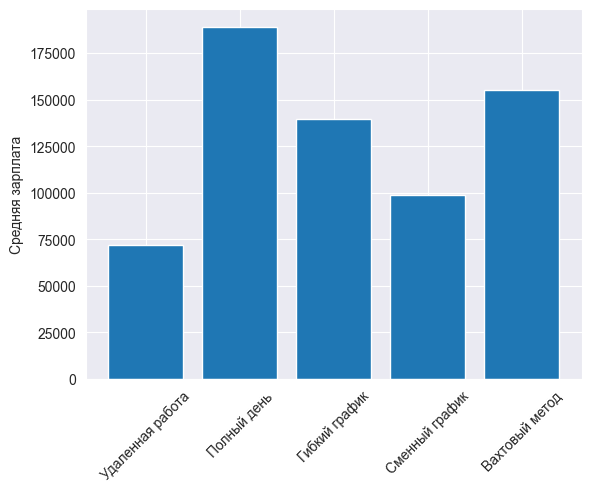

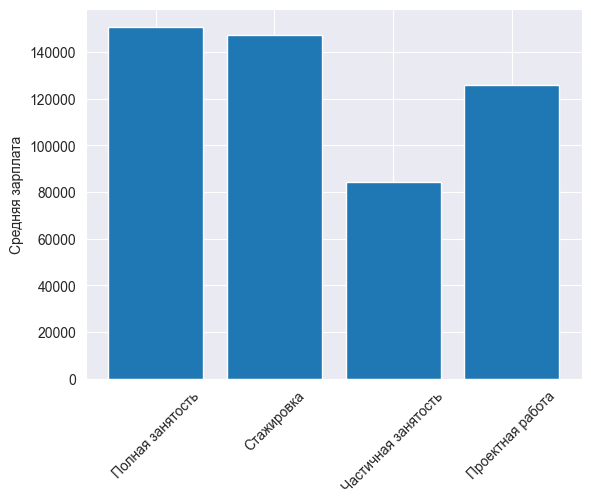

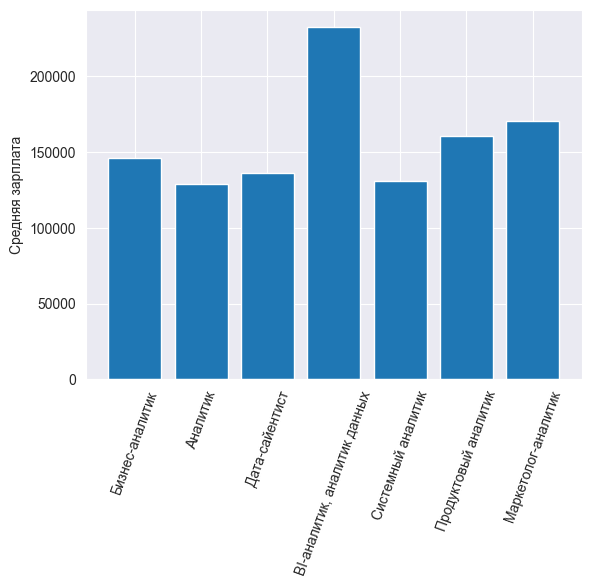

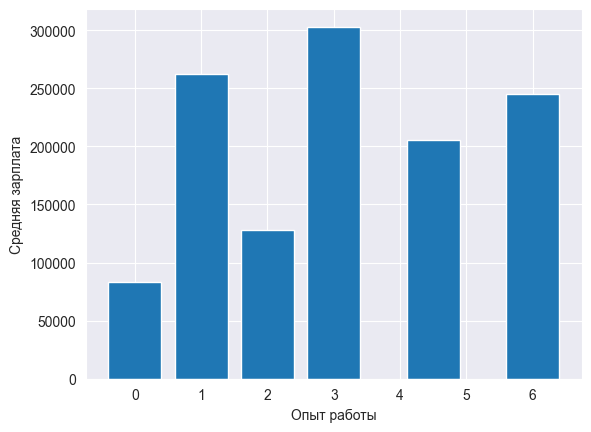

In [174]:
main = clear_data.groupby('schedule')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main.index, main)

ax.set_xticks(range(len(main.index)))
ax.set_xticklabels(['Удаленная работа', 'Полный день', 'Гибкий график',
       'Сменный график', 'Вахтовый метод'], rotation=45)
ax.set_ylabel('Средняя зарплата')

main_2 = clear_data.groupby('employment')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_2.index, main_2)

ax.set_xticks(range(len(main_2.index)))
ax.set_xticklabels(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], rotation=45)
ax.set_ylabel('Средняя зарплата')

main_3 = clear_data.groupby('professional_roles')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_3.index, main_3)

ax.set_xticks(range(len(main_3.index)))
ax.set_xticklabels(['Бизнес-аналитик', 'Аналитик', 'Дата-сайентист',
       'BI-аналитик, аналитик данных', 'Системный аналитик',
       'Продуктовый аналитик', 'Маркетолог-аналитик'], rotation=70, fontsize=10)
ax.set_ylabel('Средняя зарплата')

main_4 = clear_data.groupby('experience')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_4.index, main_4)
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Средняя зарплата')

plt.show()

Эмпирически установлено, что ошибка больше, когда CatBoost сам обрабатывает категориальные признаки. Качество было лучше при ручном енкодинге признаков

Рассмотрим навыки для каждой профессии отдельно

In [175]:
data_bi = clear_data[clear_data['professional_roles'] == 'BI-аналитик, аналитик данных']
data_anal = clear_data[clear_data['professional_roles'] == 'Аналитик']
data_bus = clear_data[clear_data['professional_roles'] == 'Бизнес-аналитик']
data_sci = clear_data[clear_data['professional_roles'] == 'Дата-сайентист']
data_prod = clear_data[clear_data['professional_roles'] == 'Продуктовый аналитик']
data_sys = clear_data[clear_data['professional_roles'] == 'Системный аналитик']
data_mar = clear_data[clear_data['professional_roles'] == 'Маркетолог-аналитик']

In [176]:
clear_data.head()

key_skills         area  \
0  bpmn, epc, uml, ms dynamics crm, power bi, sql...       Москва   
1  postgresql, clickhouse, numpy, pandas, kuberne...       Москва   
2  коммуникабельность, системность, обучаемость, ...       Москва   
3  sql, базы данных, python, power bi, ms sql, ap...  Калининград   
4  clickhouse, postgresql, mongodb, etl, powerbi,...       Москва   

           schedule  experience        employment  \
0  Удаленная работа         2.0  Полная занятость   
1       Полный день         4.5  Полная занятость   
2     Гибкий график         2.0  Полная занятость   
3       Полный день         2.0  Полная занятость   
4  Удаленная работа         4.5  Полная занятость   

             professional_roles    salary  
0               Бизнес-аналитик  150000.0  
1                Дата-сайентист  350000.0  
2                      Аналитик   90000.0  
3  BI-аналитик, аналитик данных   80000.0  
4  BI-аналитик, аналитик данных  350000.0

In [177]:
def ecd_skills(df, skills):
    df['key_skills'] = df['key_skills'].fillna('')
    df['key_skills'] = df['key_skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])
    for skill in skills:
        df[skill] = df['key_skills'].apply(lambda x: 1 if skill in x else 0)
    return df

In [178]:
def freq_skills(df):
    skills = []
    for entry in df['key_skills']:
        if isinstance(entry, str):
            skills.extend([skill.strip().lower() for skill in entry.replace(';', ',').split(',')])

    skill_counts = Counter(skills)

    df_skill_counts = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

    return df_skill_counts

In [179]:
enc_skills = []
def clean_skills(skills_list, *args):
    skills_list.remove(*args)
    enc_skills.extend(skills_list)
    return enc_skills

**Считаем навыки редкими, если они встречаются реже, чем 5% от максимальной частоты**

In [180]:
freq_bi = freq_skills(data_bi)
freq_anal = freq_skills(data_anal)
freq_bus = freq_skills(data_bus)
freq_sci = freq_skills(data_sci)
freq_mar = freq_skills(data_mar)
freq_prod = freq_skills(data_prod)
freq_sys = freq_skills(data_sys)

In [181]:
freq_bi = freq_bi[freq_bi['Frequency'] > 9]

In [182]:
freq_anal = freq_anal[freq_anal['Frequency'] > 19]

In [183]:
freq_bus = freq_bus[freq_bus['Frequency'] > 10]

In [184]:
freq_sci = freq_sci[freq_sci['Frequency'] > 5]

In [185]:
freq_mar

Skill  Frequency
12           маркетинговые исследования          4
13                 маркетинговый анализ          3
14                        ms powerpoint          2
2                конкурентная аналитика          2
3             анализ бизнес показателей          2
1            аналитические исследования          2
40                                  ga4          1
31                      бренд стратегия          1
32                             а/b-тест          1
33                      ux-исследования          1
34             анализ целевой аудитории          1
35                        веб-аналитика          1
36                       яндекс.метрика          1
37                     google analytics          1
38                                  gtm          1
39                   google tag manager          1
0                       market research          1
41                            ecommerce          1
42              маркетинговая стратегия          1
29                ассортиментный анализ          1
43                        анализ данных          1
44               аналитическое мышление          1
45                            appsflyer          1
46                            amplitude          1
47                             superset          1
48                          pest-анализ          1
49                             power bi          1
50             сбор и анализ информации          1
30           маркетинговое планирование          1
26                      прогнозирование          1
28                      развитие бренда          1
27            анализ конкурентной среды          1
4   работа с большим объемом информации          1
5                    навыки презентации          1
6                    подготовка отчетов          1
7                                ms sql          1
8                                python          1
9                         data analysis          1
10                         эконометрика          1
11                             ms excel          1
15               подготовка презентаций          1
16                    digital marketing          1
17                performance-маркетинг          1
18                     бренд-менеджмент          1
19                                  seo          1
20                                  smm          1
21                 аналитические отчеты          1
22                 программы лояльности          1
23                      английский язык          1
24                            аналитика          1
25                      ценообразование          1
51         работа с системами аналитики          1

In [186]:
freq_prod = freq_prod[freq_prod['Frequency'] > 1]

In [187]:
freq_sys = freq_sys[freq_sys['Frequency'] > 1]

**Находим синонимы выражений и приводим навыки к единому виду**

In [188]:
syn_dict = {
    'анализ продаж': 'аналитика продаж',
    'анализ конкурентной среды': 'конкурентная аналитика',
    'big data': 'большие данные',
    'работа с большим объемом информации': 'большие данные',
    'bi': 'ms power bi',
    'power bi': 'ms power bi',
    'power point': 'ms powerpoint',
    'machine learning': 'машинное обучение',
    'классическое машинное обучение': 'машинное обучение',
    'математическая статистика': 'статистика',
    'статистический анализ': 'статистика',
    'databases': 'базы данных',
    'работа с базами данных': 'базы данных',
    'опыт работы с базами данных': 'базы данных',
    'аналитический склад ума': 'аналитическое мышление',
    'подготовка отчетов': 'аналитические отчеты',
    'формирование аналитической отчетности': 'аналитические отчеты',
    'data analysis': 'анализ данных',
    'сбор и анализ информации': 'анализ данных',
    'аналитические исследования': 'анализ данных',
    'системное мышление': 'системный анализ',
    'маркетинговая стратегия': 'маркетинговое планирование',
    'анализ бизнес показателей': 'бизнес-анализ',
    'анализ бизнес-процессов': 'бизнес-анализ',
    'описание бизнес-процессов': 'бизнес-анализ',
    'маркетинговые исследования': 'маркетинговый анализ',
    'agile product management': 'agile',
    'проведение презентаций': 'навыки презентации',
    'eda': 'анализ данных'}

words_2_del = ['', 'работа в команде', 'грамотная речь', 'обучение и развитие', 'коммуникабельность', 'системность',
               'обучаемость', 'оперативность', 'нацелен на результат', 'удаленная работа', 'управление командой', 'работа в команде	',
               'умение работать в коллективе', 'пользователь пк', 'точность и внимательность к деталям', 'ответственность']

def replace_synonyms(col, d):
    for i, line in enumerate(col):
        if isinstance(line, str):
            new_line = []
            words = [word.strip() for word in line.replace(';', ',').split(',')]
            new_line = [d[word] if word in d else word for word in words]
            new_line = [word for word in new_line if word not in words_2_del]
        col[i] = ','.join(new_line)
    return col

clear_data['key_skills'] = replace_synonyms(clear_data['key_skills'], syn_dict)

In [189]:
pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key) for key in syn_dict.keys()) + r')\b', re.IGNORECASE)

def replace_synonyms(text, pattern, syn_dict):
    if isinstance(text, str):
        def synonym_replacer(match):
            found_word = match.group(0).lower()
            return syn_dict.get(found_word, found_word)

        replaced_text = re.sub(pattern, synonym_replacer, text)

        words = replaced_text.split()
        unique_words = list(dict.fromkeys(words))
        return ' '.join(unique_words)

    return text

clear_data['key_skills'] = clear_data['key_skills'].apply(lambda x: replace_synonyms(x, pattern, syn_dict))

In [190]:
words_2_del = ['', 'работа в команде', 'грамотная речь', 'обучение и развитие', 'коммуникабельность', 'системность',
               'обучаемость', 'оперативность', 'нацелен на результат', 'удаленная работа', 'управление командой',
               'работа в команде', 'умение работать в коллективе', 'пользователь пк',
               'точность и внимательность к деталям', 'ответственность', 'умение принимать решения', 'командообразование']

pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in words_2_del if word) + r')\b', re.IGNORECASE)

def clean_text(text, pattern):
    if isinstance(text, str):
        cleaned_text = re.sub(pattern, '', text)
        cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()
        return cleaned_text
    return text

clear_data['key_skills'] = clear_data['key_skills'].apply(lambda x: clean_text(x, pattern))

In [191]:
def get_skills(df):
    skill_list = []
    for skills in df['Skill']:
        if isinstance(skills, str):
            skill_list.extend([skill.strip().lower() for skill in skills.replace(';', ',').split(',')])
    final_skills = list(set(skill_list))
    return final_skills

In [192]:
all_skills = (
    get_skills(freq_bi) +
    get_skills(freq_anal) +
    get_skills(freq_bus) +
    get_skills(freq_sci) +
    get_skills(freq_mar) +
    get_skills(freq_prod) +
    get_skills(freq_sys)
)

In [193]:
all_skills = list(set(all_skills))

In [194]:
d_w = ['консультирование', 'организаторские навыки', 'дистанционное обучение', 'управление требованиями', 'деловая переписка', 'техническое обслуживание', 'обучение и развитие', 'системный подход', 'английский язык', 'навыки переговоров', 'программы лояльности', 'ориентация на результат', 'техническая поддержка', 'сбор требований', 'коммуникабельность', 'деловое общение', 'умение работать в коллективе', 'ведение переговоров', 'ответственность', 'контроль выполнения задач', 'работа в команде', 'управление командой', 'деловая коммуникация', 'обучение персонала', 'обучение', 'протоколами связи и сенсорами', 'работа в условиях многозадачности', 'техническое задание', 'точность и внимательность к деталям', 'управление проектами', '', 'удаленная работа', 'планирование карьеры', 'сопровождение клиентов', 'тайм-менеджмент', 'грамотная речь']
for i in d_w:
  if i in all_skills:
    all_skills.remove(i)

In [195]:
ecd_data = clear_data.copy()
ecd_skills(ecd_data, all_skills)

key_skills         area  \
0     [bpmn, epc, uml, ms dynamics crm, ms ms power ...       Москва   
1     [postgresql, clickhouse, numpy, pandas, kubern...       Москва   
2                                                    []       Москва   
3     [sql, базы данных, python, ms ms power bi, ms ...  Калининград   
4     [clickhouse, postgresql, mongodb, etl, powerbi...       Москва   
...                                                 ...          ...   
3754  [Английский язык, AI, Jira, аналитические отче...       Сириус   
3757  [Linux, Python, Docker, Git, машинное обучение...     Мурманск   
3761  [pandas, LLM, numpy, , финансовых, разработка,...          NaN   
3762           [AI, DL, ИИ, GPU, GAN, C, , Работа, B2B]       Москва   
3763  [pandas, аналитические отчеты, ML, R, Планиров...       Сириус   

              schedule  experience        employment  \
0     Удаленная работа         2.0  Полная занятость   
1          Полный день         4.5  Полная занятость   
2        Гибкий график         2.0  Полная занятость   
3          Полный день         2.0  Полная занятость   
4     Удаленная работа         4.5  Полная занятость   
...                ...         ...               ...   
3754       Полный день         3.0  Полная занятость   
3757       Полный день         3.0  Полная занятость   
3761     Гибкий график         3.0  Полная занятость   
3762       Полный день         2.0  Полная занятость   
3763       Полный день         3.0  Полная занятость   

                professional_roles    salary  msa  erp  системная интеграция  \
0                  Бизнес-аналитик  150000.0    0    0                     0   
1                   Дата-сайентист  350000.0    0    0                     0   
2                         Аналитик   90000.0    0    0                     0   
3     BI-аналитик, аналитик данных   80000.0    0    0                     0   
4     BI-аналитик, аналитик данных  350000.0    0    0                     0   
...                            ...       ...  ...  ...                   ...   
3754                Дата-сайентист  279999.5    0    0                     0   
3757                Дата-сайентист  280000.0    0    0                     0   
3761                Дата-сайентист  325000.0    0    0                     0   
3762                Дата-сайентист  350000.0    0    0                     0   
3763                Дата-сайентист  330000.0    0    0                     0   

      ...  яндекс.метрика  анализ продаж  json  airflow  ecommerce  \
0     ...               0              0     0        0          0   
1     ...               0              0     0        0          0   
2     ...               0              0     0        0          0   
3     ...               0              0     0        0          0   
4     ...               0              0     0        0          0   
...   ...             ...            ...   ...      ...        ...   
3754  ...               0              0     0        0          0   
3757  ...               0              0     0        0          0   
3761  ...               0              0     0        0          0   
3762  ...               0              0     0        0          0   
3763  ...               0              0     0        0          0   

      ассортиментный анализ  разработка бизнес-требований  keras  \
0                         0                             0      0   
1                         0                             0      0   
2                         0                             0      0   
3                         0                             0      0   
4                         0                             0      0   
...                     ...                           ...    ...   
3754                      0                             0      0   
3757                      0                             0      0   
3761                      0                             0      0   
3762                     

In [196]:
ecd_data = ecd_data.drop('key_skills', axis=1)

**Просмотрим признаки-синонимы и объеденим колонки**

In [197]:
ecd_data['apache kafka'] += ecd_data['kafka']
ecd_data = ecd_data.drop('kafka', axis=1)

ecd_data['1с: предприятие'] += ecd_data['1с: предприятие 8']
ecd_data = ecd_data.drop('1с: предприятие 8', axis=1)

ecd_data['idef0'] += ecd_data['idef']
ecd_data = ecd_data.drop('idef', axis=1)

ecd_data['jira'] += ecd_data['atlassian jira']
ecd_data = ecd_data.drop('atlassian jira', axis=1)

ecd_data['ms power bi'] += ecd_data['bi']
ecd_data = ecd_data.drop('bi', axis=1)

ecd_data['машинное обучение'] += ecd_data['ml']
ecd_data = ecd_data.drop('ml', axis=1)

ecd_data['agile'] += ecd_data['agile project management']
ecd_data['agile'] += ecd_data['принципы разработки по (agile']
ecd_data = ecd_data.drop('agile project management', axis=1)
ecd_data = ecd_data.drop('принципы разработки по (agile', axis=1)

ecd_data['ms power bi'] += ecd_data['power bi']
ecd_data = ecd_data.drop('power bi', axis=1)

ecd_data['бренд стратегия'] += ecd_data['развитие бренда']
ecd_data = ecd_data.drop('развитие бренда', axis=1)

ecd_data['python'] += ecd_data['знание python']
ecd_data = ecd_data.drop('знание python', axis=1)

ecd_data['машинное обучение'] += ecd_data['machine learning']
ecd_data['машинное обучение'] += ecd_data['классическое машинное обучение']
ecd_data = ecd_data.drop('machine learning', axis=1)
ecd_data = ecd_data.drop('классическое машинное обучение', axis=1)

ecd_data['ms excel'] += ecd_data['excel']
ecd_data = ecd_data.drop('excel', axis=1)

ecd_data['базы данных'] += ecd_data['data base']
ecd_data = ecd_data.drop('data base', axis=1)

ecd_data['scrum'] += ecd_data['scrum)']
ecd_data['scrum'] += ecd_data['framework scrum']
ecd_data = ecd_data.drop('scrum)', axis=1)
ecd_data = ecd_data.drop('framework scrum', axis=1)

Разделяем данные на выборки

In [198]:
y = ecd_data['salary']
X = ecd_data.drop('salary', axis=1)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Категориальные признаки кодируем вручную, поскольку это эмпирически улучшает метрики по сравнению с автоматической обработкой признаков в CatBoost.

In [200]:
class Transformer:
    def __init__(self):
        self.hot_encoder = None
        self.tar_encoder = None
        self.hot_columns = []
        self.mean_columns = []

    def fit_transform(self, X, y):
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)

        columns = X.select_dtypes(include='object').columns.tolist()

        self.hot_columns = [col for col in columns if X[col].nunique() < 5]
        self.mean_columns = [col for col in columns if X[col].nunique() >= 5]

        if self.hot_columns:
            self.hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            one_hot = self.hot_encoder.fit_transform(X[self.hot_columns])
            one_hot_columns = self.hot_encoder.get_feature_names_out(self.hot_columns)
            one_hot_df = pd.DataFrame(one_hot, columns=one_hot_columns, index=X.index)
            X = pd.concat([X.drop(self.hot_columns, axis=1), one_hot_df], axis=1)

        if self.mean_columns:
            self.tar_encoder = TargetEncoder()
            mean_target = self.tar_encoder.fit_transform(X[self.mean_columns], y)
            X[self.mean_columns] = mean_target

        return X

    def transform(self, X):
        if self.hot_columns:
            one_hot = self.hot_encoder.transform(X[self.hot_columns])
            one_hot_columns = self.hot_encoder.get_feature_names_out(self.hot_columns)
            one_hot_df = pd.DataFrame(one_hot, columns=one_hot_columns, index=X.index)
            X = pd.concat([X.drop(self.hot_columns, axis=1), one_hot_df], axis=1)

        if self.mean_columns:
            mean_target = self.tar_encoder.transform(X[self.mean_columns])
            X[self.mean_columns] = mean_target

        return X

    def save_artifacts(self, filepath):
        dump({
            'hot_encoder': self.hot_encoder,
            'tar_encoder': self.tar_encoder
        }, filepath)

In [201]:
transformer = Transformer()
X_train = transformer.fit_transform(X_train, y_train)
X_test = transformer.transform(X_test)
transformer.save_artifacts('artefacts')

**Строим матрицы корреляций**

In [202]:
for_corr = pd.concat([X_train, y_train], axis=1, join='inner')
for_corr = pd.concat([for_corr.iloc[:, :3], for_corr.iloc[:, -8:]], axis=1)

Сильные отрицательные корреляции между schedule_Полный день и schedule_Удаленная работа

Указывает на сильную линейную зависимость - признак удаленной работы уменьшается при графике работы полный день

Также сильная отрицательная корреляция между employment_Полная занятость и employment Стажировка - сотрудник, работающий полный день вряд ли будет на стажировке

Итог - признаки друг друга исключают

Также коррелируют отрицательно (-0.42) experience и employment_Стажировка, employment_Полная занятость и employment_Проектная работа (-0.46) - пока один признак увеличивается, уменьшается другой, что логично

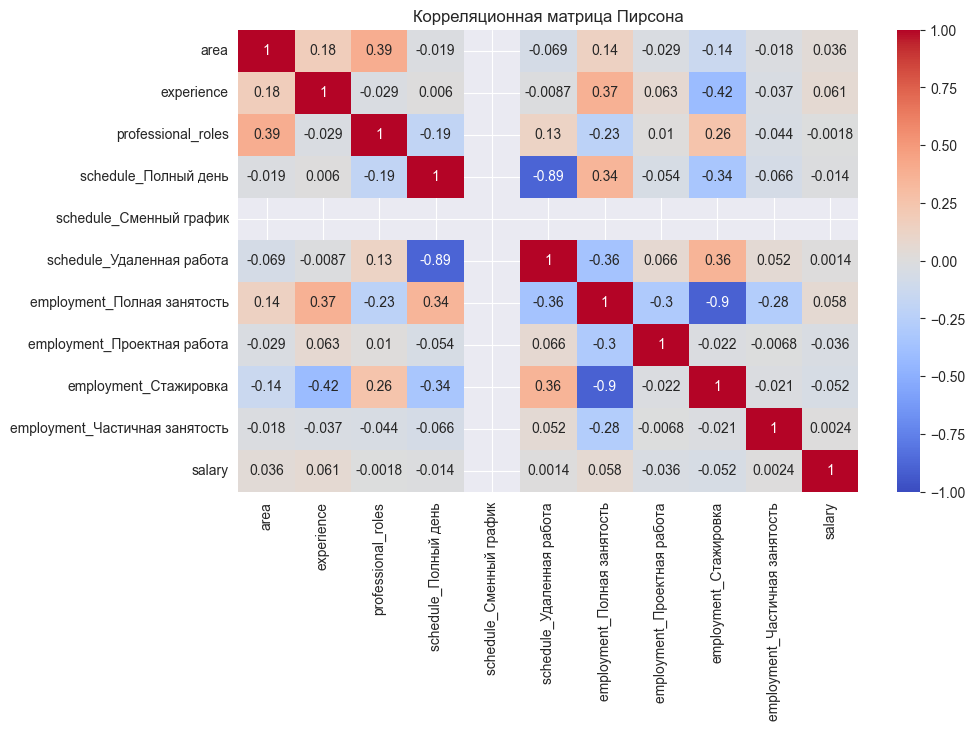

In [203]:
corr_matrix = for_corr.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица Пирсона')
plt.show()

Коэффициент Спирмена устойчив к выбросам

Также как и в матрице Пирсона присутсвуют те же сильные линейные корреляции - признаки, исключающие друг друга.

Также коррелируют отрицательно  experience и employment_Стажировка, employment_Полная занятость и employment_Проектная работа - пока один признак увеличивается, уменьшается другой, что логично



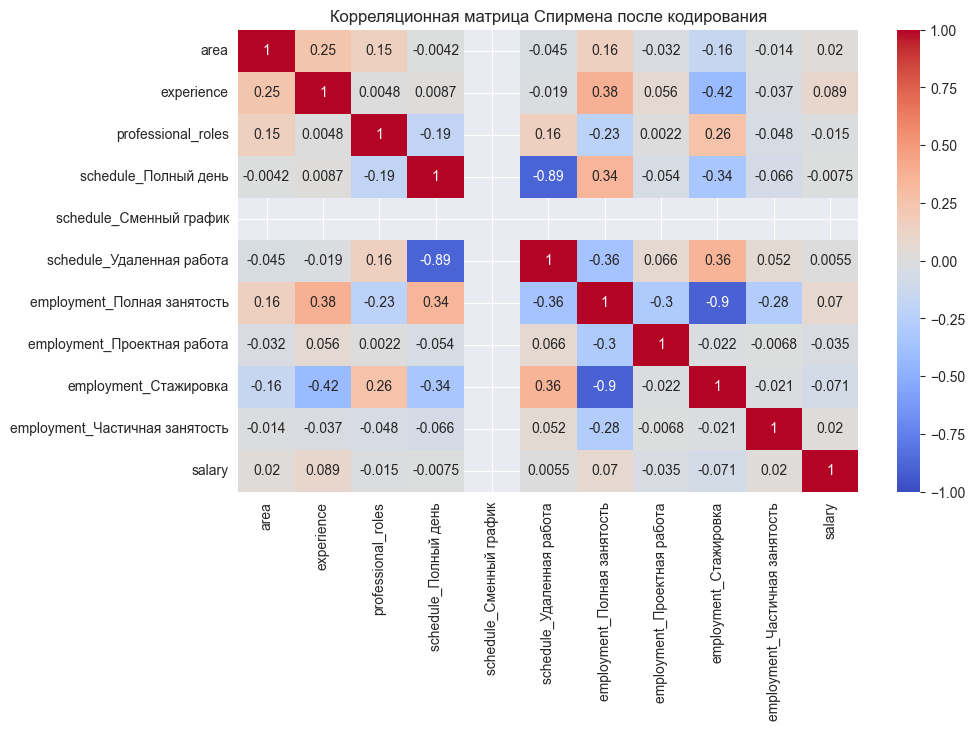

In [204]:
corr_matrix = for_corr.corr(method='spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица Спирмена после кодирования')
plt.show()

Матрица Фика фиксирует нелинейную зависимость


interval columns not set, guessing: ['area', 'experience', 'professional_roles', 'schedule_Полный день', 'schedule_Сменный график', 'schedule_Удаленная работа', 'employment_Полная занятость', 'employment_Проектная работа', 'employment_Стажировка', 'employment_Частичная занятость', 'salary']


<Axes: >

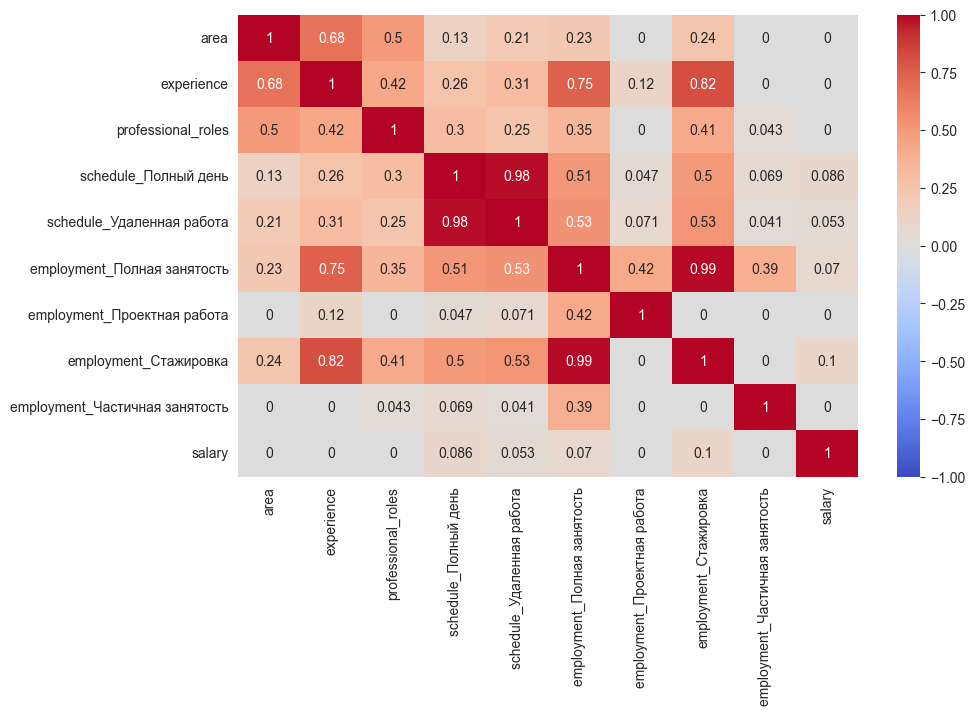

In [205]:
plt.figure(figsize=(10, 6))
sns.heatmap(for_corr.phik_matrix(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

Коффициенты Спирмана (робастны к выбросам) и коэффициента Пирсона отлчаются от друг от друга максимум на сотые значения -> в данных отсутствуют выбросы

Разница в коэффициентах корреляции между матрицами Спирмена и Фика может указывать на наличие нелинейных зависимостей в данных.

Значительная разница между коэффициентами корреляции
в Спирмена:  и в Пфика: между признаками employment_Стажировка и experience. Монотонная зависимость указывала: чем меньше опыт работы, тем выше вероятность, что человек окажется на стажировке. Высокая нелинейность может быть интерпретирована как резкое понижение вероятности нахождения на стажировке при повышении опыта;

в Спирмена:  и в Пфика: между признаками employment_Полная_занятость и experience;
действительно указывает на наличие нелинейной зависимости между этими переменными.

Выявлена очень высокая нелинейная, сложная зависимость опыта, занятости, графика работы от навыков.

Сильная зависимость между признаками employment_Полная занятость и employment Стажировка, schedule_Полный день и schedule_Удаленная работа - признаки друг друга взаимоисключают


Остальные данные содержат слабую и умеренную нелинейность

Необходимо исключить пару признаков, взаимоисключающих друг друга


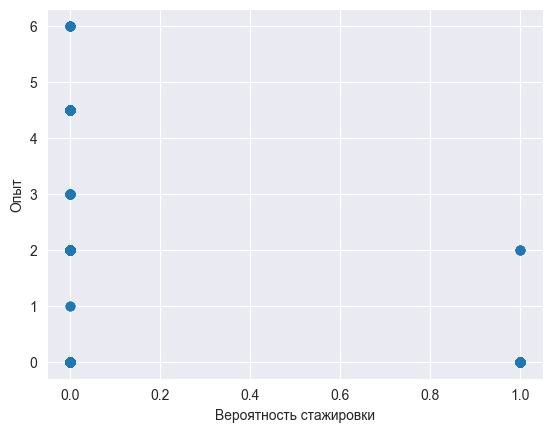

In [206]:
plt.scatter(X_train['employment_Стажировка'], X_train['experience'])
plt.xlabel('Вероятность стажировки')
plt.ylabel('Опыт')
plt.show()

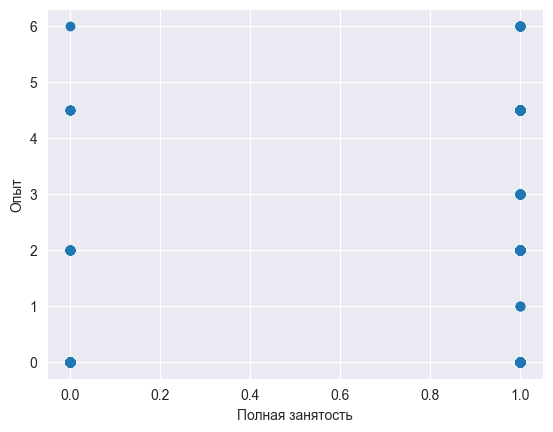

In [207]:
plt.scatter(X_train['employment_Полная занятость'], X_train['experience'])
plt.xlabel('Полная занятость')
plt.ylabel('Опыт')
plt.show()

In [208]:
def construct_features(X):
  X['experience^3'] = X['experience'] ** 3
  X['internship_experience'] = X['employment_Стажировка'] * X['experience']
  X['has_experience'] = (X['experience'] > 0).astype(int)
  return X

X_train = construct_features(X_train)
X_test = construct_features(X_test)

In [209]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

top_correlations = get_top_abs_correlations(X_train, 50)
print("Top Absolute Correlations")
print(top_correlations)

Top Absolute Correlations
продуктовый анализ                             viewability                                1.000000
resnet                                         deeplab                                    1.000000
mobilenet                                      resnet                                     1.000000
работа в режиме многозадачности                оптимизация численности персонала          1.000000
mobilenet                                      u-net                                      1.000000
инфобизнес                                     it                                         1.000000
rag                                            нейронные сети                             1.000000
mobilenet                                      deeplab                                    1.000000
resnet                                         yolo                                       1.000000
u-net                                          deeplab                             

In [210]:
corr = X_train.corr()
highly_correlated = set()
corr_threshold = 0.85
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > corr_threshold:
            colname = corr.columns[i]
            highly_correlated.add(colname)
print(*highly_correlated)

1с: управление персоналом http java оптимизация численности персонала администрирование сетевого оборудования experience^3 node.js yolo opencv viewability hr-аналитика it ar resnet javascript внедрение продукта retail жизненный цикл по employment_Стажировка db2 работа с iot-устройствами нейронные сети schedule_Удаленная работа u-net deeplab


In [211]:
list_features = ['it', 'инфобизнес', 'оптимизация численности персонала',
                 'работа в режиме многозадачности', 'retail',
                 'employment_Полная занятость', 'schedule_Полный день',
                 'продуктовый анализ', 'жизненный цикл по', 'db2',
                 'менеджмент', 'apache spark', 'plc', 'node.js']
def delete_features(l, X):
  X = X.drop(l, axis=1)
  return X

X_train = delete_features(list_features, X_train)
X_test = delete_features(list_features, X_test)

Удалим константные и квазиконстантные признаки

In [212]:
selector = VarianceThreshold(threshold=0)
selector.fit_transform(X_train, y_train)
selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]

In [213]:
selected_features

Index(['area', 'experience', 'professional_roles', 'msa', 'erp',
       'системная интеграция', 'статистика',
       'разработка проектной документации', 'bpmn', '1с:erp.ух',
       ...
       'openshift', 'schedule_Гибкий график', 'schedule_Сменный график',
       'schedule_Удаленная работа', 'employment_Проектная работа',
       'employment_Стажировка', 'employment_Частичная занятость',
       'experience^3', 'internship_experience', 'has_experience'],
      dtype='object', length=341)

In [232]:
dropped_features = list(set(X_train.columns) - set(selected_features))
len(dropped_features)

0

In [233]:
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

In [259]:
X_train.head(5)

area  experience  professional_roles  msa  erp  \
0  174385.829620         4.5       146996.424591    0    0   
1  142860.538776         0.0       167332.187240    0    0   
2  174385.829620         4.5       125737.006865    0    0   
3  112949.213039         0.0       167332.187240    0    0   
4  174385.829620         2.0       125737.006865    0    0   

   системная интеграция  статистика  разработка проектной документации  bpmn  \
0                     0           0                                  0     0   
1                     0           0                                  0     0   
2                     0           0                                  0     0   
3                     0           0                                  0     0   
4                     0           0                                  0     0   

   1с:erp.ух  ...  openshift  schedule_Гибкий график  schedule_Сменный график  \
0          0  ...          0                     0.0                      0.0   
1          0  ...          0                     0.0                      0.0   
2          0  ...          0                     0.0                      0.0   
3          0  ...          0                     0.0                      0.0   
4          0  ...          0                     0.0                      0.0   

   schedule_Удаленная работа  employment_Проектная работа  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        1.0                          0.0   
4                        0.0                          0.0   

   employment_Стажировка  employment_Частичная занятость  experience^3  \
0                    0.0                             0.0        91.125   
1                    0.0                             0.0         0.000   
2                    0.0                             0.0        91.125   
3                    1.0                             0.0         0.000   
4                    0.0                             0.0         8.000   

   internship_experience  has_experience  
0                    0.0               1  
1                    0.0               0  
2                    0.0               1  
3                    0.0               0  
4                    0.0               1  

[5 rows x 341 columns]

In [260]:
X_test.head(5)

area  experience  professional_roles  msa  erp  \
187   174385.829620         2.0       125737.006865    0    0   
372   174385.829620         4.5       146996.424591    0    0   
3211  117141.930961         2.0       167332.187240    0    0   
2115  135447.524036         4.5       125737.006865    0    0   
390   174385.829620         4.5       146996.424591    0    0   

      системная интеграция  статистика  разработка проектной документации  \
187                      0           0                                  0   
372                      0           0                                  0   
3211                     0           0                                  0   
2115                     0           0                                  0   
390                      0           0                                  0   

      bpmn  1с:erp.ух  ...  openshift  schedule_Гибкий график  \
187      0          0  ...          0                     0.0   
372      0          0  ...          0                     0.0   
3211     0          0  ...          0                     0.0   
2115     0          0  ...          0                     0.0   
390      0          0  ...          0                     0.0   

      schedule_Сменный график  schedule_Удаленная работа  \
187                       0.0                        0.0   
372                       0.0                        1.0   
3211                      0.0                        1.0   
2115                      0.0                        1.0   
390                       0.0                        1.0   

      employment_Проектная работа  employment_Стажировка  \
187                           0.0                    0.0   
372                           0.0                    0.0   
3211                          0.0                    0.0   
2115                          0.0                    0.0   
390                           0.0                    0.0   

      employment_Частичная занятость  experience^3  internship_experience  \
187                              0.0         8.000                    0.0   
372                              0.0        91.125                    0.0   
3211                             0.0         8.000                    0.0   
2115                             1.0        91.125                    0.0   
390                              0.0        91.125                    0.0   

      has_experience  
187                1  
372                1  
3211               1  
2115               1  
390                1  

[5 rows x 341 columns]

In [262]:
columns_list = list(X_test.columns)
print(columns_list)

['area', 'experience', 'professional_roles', 'msa', 'erp', 'системная интеграция', 'статистика', 'разработка проектной документации', 'bpmn', '1с:erp.ух', 'анализ', 'computer vision', 'администрирование', 'gtm', 'ms excel', 'archimate', 'xsd', 'ms sql server', 'python', 'swagger', 's3', 'uml', 'power pivot', 'scada', 'фт', 'прогнозирование', 'google analytics', '1с erp', 'tcp/ip', 'ручное тестирование', 'javascript', 'mobilenet', 'bigquery', 'kubernetes', 'ms power bi', 'машинное обучение', 'ap', 'высшее образование', 'написание инструкций', 'grafana', 'навыки презентации', 'draw.io', 'аналитик 1с', 'ит', 'atlassian confluence', 'оптимизация бизнес процессов', 'алгоритмы и структуры данных', 'визуализация данных', 'appsflyer', 'автоматизация процессов управления персоналом', 'java или c++', 'qa', 'data science', 'документирование бизнес-требований', 'ценообразование', 'создание', 'c++', 'google docs', 'nosql', 'впр', 'nlp', 'аналитические способности', 'graphql', 'ux', 'ms sql', 'asana

 Выводы: необходимо было сконструировать новые фичи, для объяснения нелинейности модели, избегать даталиков. Главным образом на качество повлияли новые фичи и удаление сильно коррелирующих фичей. Все данные были подвергнуты преобразованию: среднее арифметическое от зарплаты и опыта работы, енкодинг локации, должностей, занятости и графика работы. Для данных,  коррелирующих нелинейно необходимо было сделать новые признаки (возведение в степень и т.д).  Навыки были отобраны и почищены,  чтобы проинтерпретировать вклад в предсказанный результат.

**Строим модели на данных**

Сравниваем статистики для X_train, X_test, y_train, y_test

In [234]:
print("Train target mean:", np.mean(y_train))
print("Train target std:", np.std(y_train))
print("Train target median:", np.median(y_train))

print("Test target mean:", np.mean(y_test))
print("Test target std:", np.std(y_test))
print("Test target median:", np.median(y_test))

Train target mean: 145010.7657221902
Train target std: 78042.52619659765
Train target median: 120000.0
Test target mean: 150089.04236647172
Test target std: 78139.49208705197
Test target median: 126250.0


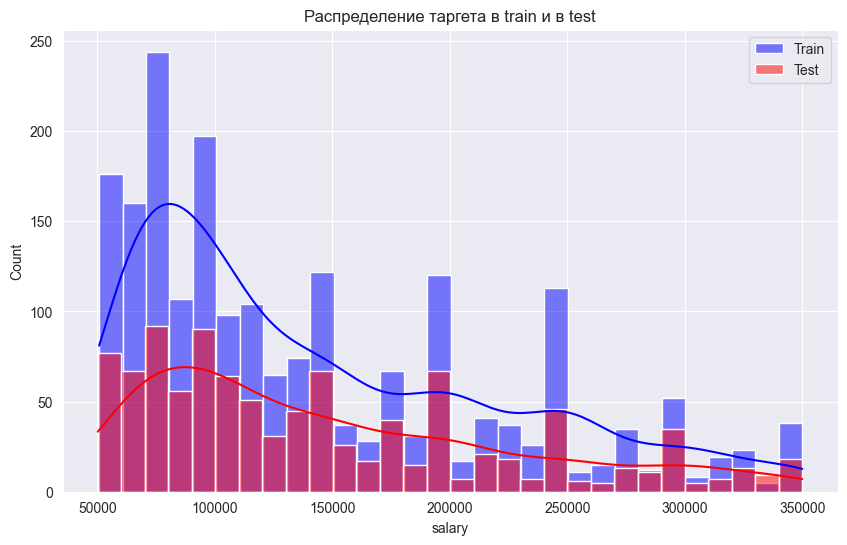

In [235]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, color="blue", label="Train", kde=True, bins=30)
sns.histplot(y_test, color="red", label="Test", kde=True, bins=30)
plt.title("Распределение таргета в train и в test")
plt.legend()
plt.show()

In [236]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [237]:
train_preds = model_rf.predict(X_train)
test_preds = model_rf.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне случайного леса {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте случайного леса {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
print(f'MAE случайного леса на трейне: {train_mae}')
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE случайного леса на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE случайного леса на трейне: {train_rmse}')
print(f'RMSE случайного леса на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE случайного леса на трейне: {train_mape}')
print(f'MAPE случайного леса на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE случайного леса на трейне: {train_rmsle}')
print(f'RMSLE случайного леса на тесте: {test_rmsle}')


MPE на трейне случайного леса -0.04568187113552591
MPE на тесте случайного леса -0.11769185344479212
-------------------------------------------------
MAE случайного леса на трейне: 15237.718717223945
MAE случайного леса на тeсте: 44903.50636441896
-------------------------------------------------
RMSE случайного леса на трейне: 21133.711036086115
RMSE случайного леса на тесте: 60633.00805606423
-------------------------------------------------
MAPE случайного леса на трейне: 0.12054513076973176
MAPE случайного леса на тесте: 0.33855725051085217
-------------------------------------------------
RMSLE случайного леса на трейне: 0.1549325459962149
RMSLE случайного леса на тесте: 0.40102180572202595


In [238]:
model = CatBoostRegressor(random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.045973
0:	learn: 76330.0063250	total: 16.8ms	remaining: 16.8s
1:	learn: 74592.0828613	total: 20.8ms	remaining: 10.4s
2:	learn: 73014.8080570	total: 23.6ms	remaining: 7.84s
3:	learn: 71619.5853140	total: 25.8ms	remaining: 6.43s
4:	learn: 70274.3216870	total: 28ms	remaining: 5.57s
5:	learn: 68998.6716284	total: 30.4ms	remaining: 5.03s
6:	learn: 67720.4160799	total: 33.3ms	remaining: 4.72s
7:	learn: 66574.9608172	total: 35.3ms	remaining: 4.38s
8:	learn: 65412.6876184	total: 38.5ms	remaining: 4.24s
9:	learn: 64408.8754616	total: 40.9ms	remaining: 4.05s
10:	learn: 63551.8944816	total: 43.2ms	remaining: 3.89s
11:	learn: 62716.5266341	total: 45.6ms	remaining: 3.75s
12:	learn: 61859.0008263	total: 47.9ms	remaining: 3.64s
13:	learn: 61097.9410794	total: 50.5ms	remaining: 3.55s
14:	learn: 60436.2745201	total: 52.8ms	remaining: 3.47s
15:	learn: 59742.8622995	total: 55.7ms	remaining: 3.42s
16:	learn: 59090.2456791	total: 58ms	remaining: 3.35s
17:	learn: 58568.5444731	total: 

In [239]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне бустинга {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте бустинга {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE бустинга на трейне: {train_mae}')
print(f'MAE бустинга  на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE бустинга на трейне: {train_rmse}')
print(f'RMSE бустинга на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE бустинга на трейне: {train_mape}')
print(f'MAPE бустинга на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE бустинга на трейне: {train_rmsle}')
print(f'RMSLE бустинга на тесте: {test_rmsle}')

MPE на трейне бустинга -0.09163681640262233
MPE на тесте бустинга -0.13453483987557666
-------------------------------------------------
MAE бустинга на трейне: 28676.683012239515
MAE бустинга  на тeсте: 44390.583863395404
-------------------------------------------------
RMSE бустинга на трейне: 37868.966987302556
RMSE бустинга на тесте: 58810.994667387225
-------------------------------------------------
MAPE бустинга на трейне: 0.23260612023669178
MAPE бустинга на тесте: 0.342000823344375
-------------------------------------------------
RMSLE бустинга на трейне: 0.27367446597464035
RMSLE бустинга на тесте: 0.39218453497412586


In [240]:
best_loss = float('inf')
best_model_filename = "best_catboost_model.cbm"

def objective(trial):
    global best_loss

    param = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.02),
        'depth': trial.suggest_int('depth', 4, 10),  # Ограничение на глубину дерева
        'l2_leaf_reg': trial.suggest_uniform('l2_leaf_reg', 3.0, 10.0),  # Больше регуляризации
        'min_child_samples': trial.suggest_categorical('min_child_samples', [4, 8, 16, 32]),
        'grow_policy': 'Depthwise',
        'iterations': 8000,
        'use_best_model': True,
        'eval_metric': 'RMSE',
        'od_type': 'iter',
        'od_wait': 20,
        'random_state': 42,
        'logging_level': 'Silent'
    }

    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_train.copy(), y_train.copy())],
                  early_stopping_rounds=100)

    test_loss = root_mean_squared_error(y_test, regressor.predict(X_test.copy()))


    if test_loss < best_loss:
        best_loss = test_loss
        regressor.save_model(best_model_filename)
        print(f"New best model saved with test loss: {best_loss}")

    return test_loss


Для подбора гиперпараметров библиотека Optuna

In [241]:
%%time
study = optuna.create_study(study_name='catboost-seed42')
study.optimize(objective, n_trials=50, n_jobs=-1, timeout=3600) #500 trials

[I 2024-10-20 06:53:54,336] A new study created in memory with name: catboost-seed42
[I 2024-10-20 06:54:42,449] Trial 4 finished with value: 59521.884602482896 and parameters: {'learning_rate': 0.012650426564070774, 'depth': 4, 'l2_leaf_reg': 6.161299603496063, 'min_child_samples': 32}. Best is trial 4 with value: 59521.884602482896.


New best model saved with test loss: 59521.884602482896


[I 2024-10-20 06:54:45,228] Trial 8 finished with value: 60318.10989818683 and parameters: {'learning_rate': 0.016509933414231986, 'depth': 4, 'l2_leaf_reg': 7.648236812784099, 'min_child_samples': 8}. Best is trial 4 with value: 59521.884602482896.
[I 2024-10-20 06:54:47,128] Trial 11 finished with value: 57736.637403025925 and parameters: {'learning_rate': 0.003923243160588047, 'depth': 4, 'l2_leaf_reg': 7.383353340272372, 'min_child_samples': 32}. Best is trial 11 with value: 57736.637403025925.


New best model saved with test loss: 57736.637403025925


[I 2024-10-20 06:54:54,012] Trial 18 finished with value: 59449.024981019735 and parameters: {'learning_rate': 0.008182721092730983, 'depth': 5, 'l2_leaf_reg': 3.6220975751005, 'min_child_samples': 32}. Best is trial 11 with value: 57736.637403025925.
[I 2024-10-20 06:54:57,363] Trial 2 finished with value: 57799.86508059384 and parameters: {'learning_rate': 0.002235599700271988, 'depth': 5, 'l2_leaf_reg': 3.0793078780283656, 'min_child_samples': 16}. Best is trial 11 with value: 57736.637403025925.
[I 2024-10-20 06:55:02,745] Trial 9 finished with value: 59827.17438953949 and parameters: {'learning_rate': 0.013398536451703406, 'depth': 6, 'l2_leaf_reg': 8.907366966073045, 'min_child_samples': 32}. Best is trial 11 with value: 57736.637403025925.
[I 2024-10-20 06:55:03,434] Trial 14 finished with value: 61759.61699698892 and parameters: {'learning_rate': 0.019504884595005736, 'depth': 6, 'l2_leaf_reg': 4.475347423170763, 'min_child_samples': 32}. Best is trial 11 with value: 57736.6374

New best model saved with test loss: 56997.27435622056


[I 2024-10-20 06:55:31,493] Trial 13 finished with value: 57232.963398632 and parameters: {'learning_rate': 0.001457819608929385, 'depth': 7, 'l2_leaf_reg': 8.735065767847399, 'min_child_samples': 16}. Best is trial 20 with value: 56997.27435622056.
[I 2024-10-20 06:55:38,279] Trial 3 finished with value: 58741.692757902725 and parameters: {'learning_rate': 0.005204116584385371, 'depth': 8, 'l2_leaf_reg': 8.736392626063921, 'min_child_samples': 8}. Best is trial 20 with value: 56997.27435622056.
[I 2024-10-20 06:55:42,987] Trial 25 finished with value: 60599.43203087849 and parameters: {'learning_rate': 0.01790532690865678, 'depth': 4, 'l2_leaf_reg': 6.224841563680188, 'min_child_samples': 16}. Best is trial 20 with value: 56997.27435622056.
[I 2024-10-20 06:55:45,205] Trial 15 finished with value: 61081.18343126429 and parameters: {'learning_rate': 0.008463949063876361, 'depth': 9, 'l2_leaf_reg': 3.265091320933725, 'min_child_samples': 16}. Best is trial 20 with value: 56997.274356220

New best model saved with test loss: 56936.30870756422


[I 2024-10-20 06:58:07,109] Trial 32 finished with value: 57103.960412809276 and parameters: {'learning_rate': 0.0011419137265676475, 'depth': 10, 'l2_leaf_reg': 9.916676476111627, 'min_child_samples': 16}. Best is trial 46 with value: 56936.30870756422.
[I 2024-10-20 06:58:08,791] Trial 33 finished with value: 57136.27614538992 and parameters: {'learning_rate': 0.001234906764779131, 'depth': 10, 'l2_leaf_reg': 9.943481194850463, 'min_child_samples': 16}. Best is trial 46 with value: 56936.30870756422.
[I 2024-10-20 06:58:09,585] Trial 31 finished with value: 57104.51559909874 and parameters: {'learning_rate': 0.001116336765002827, 'depth': 8, 'l2_leaf_reg': 6.961463302248892, 'min_child_samples': 4}. Best is trial 46 with value: 56936.30870756422.
[I 2024-10-20 06:58:17,900] Trial 47 finished with value: 56976.70680063907 and parameters: {'learning_rate': 0.0010449388544731934, 'depth': 5, 'l2_leaf_reg': 7.175857405804987, 'min_child_samples': 4}. Best is trial 46 with value: 56936.30

CPU times: total: 1h 46min 23s
Wall time: 6min 28s


In [250]:
print(study.best_value)
print(study.best_params)

56936.30870756422
{'learning_rate': 0.0010053111935322122, 'depth': 5, 'l2_leaf_reg': 9.968334851857037, 'min_child_samples': 4}


In [251]:
model_hyper = CatBoostRegressor(**study.best_params, iterations=10000, early_stopping_rounds=100, random_state=42) #10000
model_hyper.fit(X_train, y_train)
model_hyper.save_model('cb_super5',
           format="cbm",
           export_parameters=None,
           pool=None)

0:	learn: 78006.5674032	total: 2.9ms	remaining: 29s
1:	learn: 77968.2852014	total: 4.98ms	remaining: 24.9s
2:	learn: 77931.2492145	total: 7.06ms	remaining: 23.5s
3:	learn: 77894.0834927	total: 8.86ms	remaining: 22.2s
4:	learn: 77862.7584180	total: 10.7ms	remaining: 21.3s
5:	learn: 77830.1863606	total: 12.3ms	remaining: 20.6s
6:	learn: 77795.5710543	total: 14ms	remaining: 20s
7:	learn: 77763.3846616	total: 15.7ms	remaining: 19.6s
8:	learn: 77725.3461131	total: 17.5ms	remaining: 19.4s
9:	learn: 77688.6531445	total: 19.2ms	remaining: 19.2s
10:	learn: 77652.8676998	total: 21ms	remaining: 19.1s
11:	learn: 77614.6432164	total: 22.8ms	remaining: 18.9s
12:	learn: 77582.0441411	total: 24.5ms	remaining: 18.8s
13:	learn: 77549.4758394	total: 26.5ms	remaining: 18.9s
14:	learn: 77512.9551309	total: 28.5ms	remaining: 19s
15:	learn: 77476.0992262	total: 30.3ms	remaining: 18.9s
16:	learn: 77442.0363961	total: 32.3ms	remaining: 18.9s
17:	learn: 77407.3788359	total: 34.1ms	remaining: 18.9s
18:	learn: 77

In [252]:
train_preds = model_hyper.predict(X_train)
test_preds = model_hyper.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне бустинга {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте бустинга {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE бустинга на трейне: {train_mae}')
print(f'MAE бустинга  на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE бустинга на трейне: {train_rmse}')
print(f'RMSE бустинга на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE бустинга на трейне: {train_mape}')
print(f'MAPE бустинга на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE бустинга на трейне: {train_rmsle}')
print(f'RMSLE бустинга на тесте: {test_rmsle}')

MPE на трейне бустинга -0.12974531907389555
MPE на тесте бустинга -0.12630164707879823
-------------------------------------------------
MAE бустинга на трейне: 37151.580225116464
MAE бустинга  на тeсте: 42923.57988876308
-------------------------------------------------
RMSE бустинга на трейне: 49196.488491336684
RMSE бустинга на тесте: 56878.86237797043
-------------------------------------------------
MAPE бустинга на трейне: 0.3001060242676087
MAPE бустинга на тесте: 0.32810163376021056
-------------------------------------------------
RMSLE бустинга на трейне: 0.3423702190770934
RMSLE бустинга на тесте: 0.3752623939268347


**Анализ результатов**

При преобразовании признаков experience метрики улучшились.Убраны дата лики -> ситуация с переобучением улучшилась. Убраны константные признаки. До преобразований и консутрирования новых признаков результаты лучшей модели с гиперпараметрами составляли: RMSE на тесте 56878.8623, а MAPE 0.3281

Наилучшие метрики из всех экспериментов

**RMSE на трейне:** 49196.4884

**RMSE на тесте:** 56878.8623

RMSE - более чувствительная метрика к большим ошибкам, чем MAE. Аналогично MAE, RMSE на тесте значительно выше, чем на трейнере, что говорит о плохой обобщающей способности модели.

**MAPE на трейне:** 0.3001

**MAPE на тесте:** 0.3281

MAPE показывает средний процент ошибки прогнозирования. Значительное увеличение MAPE на тестовых данных по сравнению с тренировочными также подтверждает проблемы с обобщением модели.

1. RMSE (Root Mean Squared Error) - основная метрика

Выбор RMSE в качестве основной метрики обусловлен несколькими факторами:

* Чувствительность к ошибкам: RMSE более чувствительна к большим ошибкам, чем MAE. Это важно, если большие ошибки имеют серьезные последствия. Например, в прогнозировании цен на недвижимость большая ошибка может привести к значительным финансовым потерям.
* Масштабируемость: RMSE имеет тот же масштаб, что и исходные данные. Это делает ее более понятной и сравнимой с другими показателями.
* Интуитивность: RMSE легко интерпретировать как среднюю ошибку прогнозирования в масштабе исходных данных.

2. MAPE (Mean Absolute Percentage Error) - для интерпретации RMSE

MAPE дополняет RMSE, помогая интерпретировать ее результаты:

* Процентная ошибка: MAPE показывает среднюю процентную ошибку прогнозирования. Это помогает понять, насколько велика ошибка относительно фактического значения. Например, если RMSE = 10000, но MAPE = 5%, то это означает, что ошибка составляет 5% от фактического значения.
* Сравнение разных моделей: MAPE позволяет сравнивать качество разных моделей, даже если они прогнозируют разные значения.

Почему не выбраны другие метрики:

* MPE (Mean Percentage Error): MPE чувствительна к выбросам, и ее значения могут быть сильно искажены, если есть несколько больших ошибок.
* MAE (Mean Absolute Error): MAE не так чувствительна к большим ошибкам, как RMSE.
* RMSLE (Root Mean Squared Logarithmic Error): RMSLE полезен для 'перепрогноза'. Перепрогноз зарплат может вызвать положительную эмоцию у пользователей, однако при несоотсветствии зарплат на рынке и в продукте, пользователи перестанут доверять продукту

Выводы:

Метрики улучшились, однако все еще демонстрируют плохую обобщаемость модели


In [253]:
model_load = CatBoostRegressor()
model_load.load_model('cb_super5')

Получаем вклад каждого признака в результат

In [254]:
explainer = shap.Explainer(model_load)
shap_values = explainer(X_test)

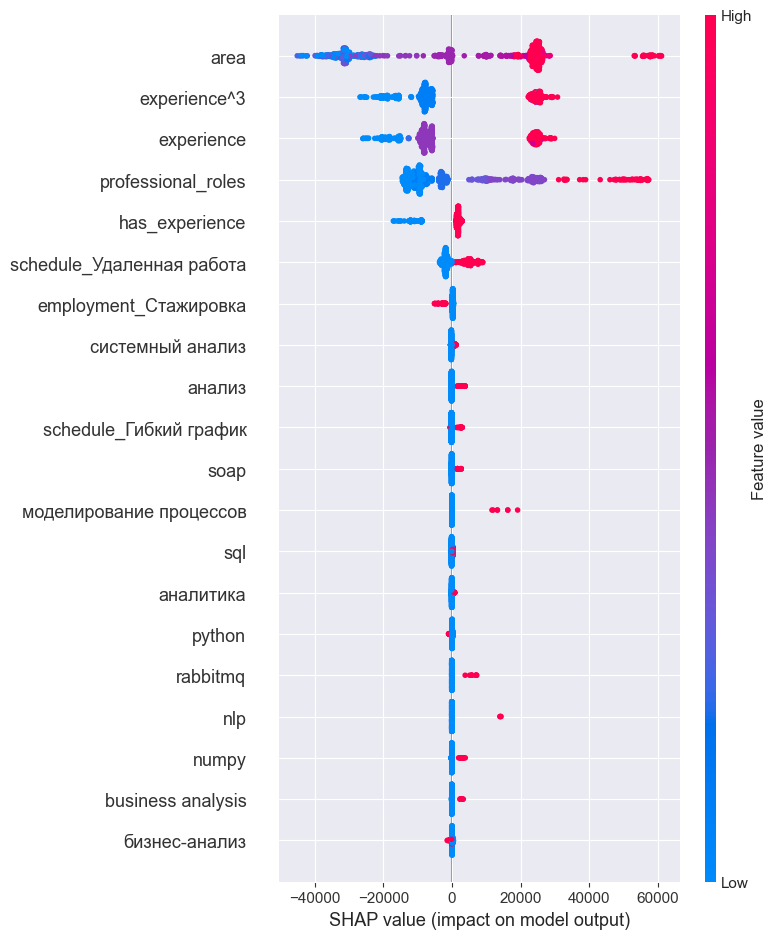

In [255]:
shap.summary_plot(shap_values, X_test)

Видим, что самыми значимыми признаками, которые оказывают наибольшее влияние на предсказания модели, являются: area, experience, experience^3

In [256]:
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

In [257]:
shap_values_df

area    experience  professional_roles       msa       erp  \
0     23442.727870  -8010.076984       -13128.506624  0.234209 -5.772503   
1     25129.842410  25306.837736        -2134.846575  0.481681 -3.206917   
2    -36759.594859  -7308.972608        17171.992948  0.150049 -3.433605   
3    -33607.711438  24848.149694       -10569.505698  0.382079 -3.285105   
4     25354.943358  25479.829236        -2283.036658  0.459761 -3.180235   
...            ...           ...                 ...       ...       ...   
1021  23466.209120  -8135.865694       -13219.858452  0.227512 -5.820233   
1022 -23741.321989 -15990.859523        -1607.469833  0.071163 -4.640768   
1023  23927.521817  -9301.162717        -3795.338076  0.225831 -4.967940   
1024 -33930.802524  -6349.811431        -2898.405550  0.110153 -4.204050   
1025 -31411.131040  -5871.617697        -7655.364405  0.118156 -4.051780   

      системная интеграция  статистика  разработка проектной документации  \
0                -3.129115   -4.148288                          -0.541383   
1                -1.630458    3.023029                           0.971232   
2                -4.542218   -1.884295                          -0.187341   
3                -3.021285   -0.161725                           0.486426   
4                -1.559964    1.434802                           1.032718   
...                    ...         ...                                ...   
1021             -3.245794   -3.461779                          -0.541383   
1022             -5.729233   -4.889901                          -0.359750   
1023             -2.157864    0.110122                          -0.018601   
1024             -4.642552   -4.329905                          -0.137684   
1025             -5.048913   -4.137538                          -0.085945   

           bpmn  1с:erp.ух  ...  openshift  schedule_Гибкий график  \
0     11.208945   0.229037  ...  -0.068375             -129.585179   
1     -5.732591   0.286482  ...   0.032959             -103.953510   
2    -14.952724   0.248960  ...  -0.070672             -101.418288   
3     -4.476538   0.238222  ...  -0.041861             -113.409252   
4     -6.777974   0.290161  ...   0.024881             -104.596431   
...         ...        ...  ...        ...                     ...   
1021  11.229347   0.230490  ...  -0.068985             -132.477981   
1022 -17.296756   0.190529  ...  -0.128970             -107.651456   
1023  -1.767878   0.241120  ...  -0.060609             -117.709390   
1024  -9.511399   0.194194  ...  -0.120393             -145.419003   
1025  -2.033614   0.194194  ...  -0.117661             -143.505498   

      schedule_Сменный график  schedule_Удаленная работа  \
0                    0.607126               -1818.378869   
1                    0.613342                5722.854731   
2                    0.517077                4604.033252   
3                    0.513459                8642.245614   
4                    0.613342                5929.464857   
...                       ...                        ...   
1021                 0.607126               -1714.945776   
1022                 0.372034                3877.618732   
1023                 0.600258                3464.811520   
1024                 0.483881               -1872.211734   
1025                 0.479903               -1946.827934   

      employment_Проектная работа  employment_Стажировка  \
0                       -5.776430             224.780577   
1                        7.786823             270.046620   
2                        5.010009             270.050381   
3                        7.467689             152.328835   
4                        7.677698             275.395749   
...                           ...                    ...   
1021                    -6.704109             221.529523   
1022                     5.189399           -1969.217402   
1023                     6.657287             287.295511   
1024          